In [5]:
#cell 1:import some library
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [13]:
#cell 2:uploading data
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

# Read files as DataFrames
bus_routes = pd.read_csv('current_bus_routes.csv')
metro_lines = pd.read_csv('current_metro_lines.csv')
roads = pd.read_csv('existing_roads.csv')
facilities = pd.read_csv('important_facilities.csv')
neighborhoods = pd.read_csv('neighborhoods_districts.csv')
new_roads = pd.read_csv('potential_new_roads1.csv')
demand = pd.read_csv('public_transportation_demand.csv')
traffic = pd.read_csv('traffic_flow_patterns.csv')

Saving current_bus_routes.csv to current_bus_routes (3).csv
Saving current_metro_lines.csv to current_metro_lines (3).csv
Saving existing_roads.csv to existing_roads (3).csv
Saving important_facilities.csv to important_facilities (3).csv
Saving intersections.csv to intersections (3).csv
Saving landscape_background.jpg to landscape_background.jpg
Saving neighborhoods_districts.csv to neighborhoods_districts (3).csv
Saving potential_new_roads1.csv to potential_new_roads1 (3).csv
Saving public_transportation_demand.csv to public_transportation_demand (3).csv
Saving traffic_flow_patterns.csv to traffic_flow_patterns (3).csv


In [3]:
#cell 3:handling neighborhoods_district and important_facilities
import pandas as pd

# Loading data files
neighborhoods_df = pd.read_csv('neighborhoods_districts.csv')
facilities_df = pd.read_csv('important_facilities.csv')

# Checking column names
print("Columns in neighborhoods_df:", neighborhoods_df.columns.tolist())
print("Columns in facilities_df:", facilities_df.columns.tolist())

# Standardizing column names
for df in [neighborhoods_df, facilities_df]:
    # Removing whitespace from column names
    df.columns = df.columns.str.strip()
    # Standardizing 'Type' column name
    for col in df.columns:
        if col.lower() == 'type':
            df.rename(columns={col: 'Type'}, inplace=True)

# Ensuring 'Type' column exists
for df in [neighborhoods_df, facilities_df]:
    if 'Type' not in df.columns:
        print(f"Warning: 'Type' column not found in {df}. Adding with default values.")
        df['Type'] = 'Unknown'

# Filling missing values in 'Type'
neighborhoods_df['Type'] = neighborhoods_df['Type'].fillna('Unknown')
facilities_df['Type'] = facilities_df['Type'].fillna('Unknown')

# Adding 'Population' column to facilities_df if missing
if 'Population' not in facilities_df.columns:
    facilities_df['Population'] = None

# Selecting required columns
neighborhoods_df = neighborhoods_df[['ID', 'Name', 'Population', 'Type', 'X-coordinate', 'Y-coordinate']]
facilities_df = facilities_df[['ID', 'Name', 'Population', 'Type', 'X-coordinate', 'Y-coordinate']]

# Merging neighborhoods and facilities
nodes_df = pd.concat([neighborhoods_df, facilities_df], ignore_index=True)

# Renaming coordinate columns
nodes_df = nodes_df.rename(columns={
    'X-coordinate': 'X',
    'Y-coordinate': 'Y'
})

# Converting ID to string
nodes_df['ID'] = nodes_df['ID'].astype(str)

# Verifying 'Type' column presence
if 'Type' not in nodes_df.columns:
    raise ValueError("'Type' column not found in nodes_df!")

# Checking for missing values in 'Type'
print("Missing values in 'Type' in nodes_df after merging:")
print(nodes_df[nodes_df['Type'].isnull()])
nodes_df['Type'] = nodes_df['Type'].fillna('Unknown')

# Checking for missing coordinates
print("Missing values in X in nodes_df:")
print(nodes_df[nodes_df['X'].isnull()])
print("Missing values in Y in nodes_df:")
print(nodes_df[nodes_df['Y'].isnull()])

# Filling missing coordinates with 0 as a temporary solution
nodes_df['X'] = nodes_df['X'].fillna(0)
nodes_df['Y'] = nodes_df['Y'].fillna(0)

# Checking coordinate ranges
print("Range of X in nodes_df:", nodes_df['X'].min(), "to", nodes_df['X'].max())
print("Range of Y in nodes_df:", nodes_df['Y'].min(), "to", nodes_df['Y'].max())

# Scaling coordinates to range 0-100
x_min, x_max = nodes_df['X'].min(), nodes_df['X'].max()
y_min, y_max = nodes_df['Y'].min(), nodes_df['Y'].max()
if x_max != x_min:
    nodes_df['X'] = (nodes_df['X'] - x_min) / (x_max - x_min) * 100
else:
    nodes_df['X'] = 50  # Default value if all X coordinates are the same
if y_max != y_min:
    nodes_df['Y'] = (nodes_df['Y'] - y_min) / (y_max - y_min) * 100
else:
    nodes_df['Y'] = 50  # Default value if all Y coordinates are the same

print("Range of X after scaling:", nodes_df['X'].min(), "to", nodes_df['X'].max())
print("Range of Y after scaling:", nodes_df['Y'].min(), "to", nodes_df['Y'].max())

# Creating dictionary to map names to IDs
name_to_id = {row['Name']: row['ID'] for _, row in nodes_df.iterrows()}
print("Name to ID dictionary:", name_to_id)

# Verifying the data
print("Number of nodes (neighborhoods + facilities):", len(nodes_df))
print("Columns in nodes_df:", nodes_df.columns.tolist())
print("Sample from nodes_df:")
print(nodes_df[['ID', 'Name', 'Type', 'X', 'Y']].head(25))

Columns in neighborhoods_df: ['ID', 'Name', 'Population', 'Type', 'X-coordinate', 'Y-coordinate']
Columns in facilities_df: ['ID', 'Name', 'Type', 'X-coordinate', 'Y-coordinate']
Missing values in 'Type' in nodes_df after merging:
Empty DataFrame
Columns: [ID, Name, Population, Type, X, Y]
Index: []
Missing values in X in nodes_df:
Empty DataFrame
Columns: [ID, Name, Population, Type, X, Y]
Index: []
Missing values in Y in nodes_df:
Empty DataFrame
Columns: [ID, Name, Population, Type, X, Y]
Index: []
Range of X in nodes_df: 30.94 to 31.8
Range of Y in nodes_df: 29.85 to 30.11
Range of X after scaling: 0.0 to 100.0
Range of Y after scaling: 0.0 to 100.0
Name to ID dictionary: {'Maadi': '1', 'Nasr City': '2', 'Downtown Cairo': '3', 'New Cairo': '4', 'Heliopolis': '5', 'Zamalek': '6', '6th October City': '7', 'Giza': '8', 'Mohandessin': '9', 'Dokki': '10', 'Shubra': '11', 'Helwan': '12', 'New Administrative Capital': '13', 'Al Rehab': '14', 'Sheikh Zayed': '15', 'Cairo International Airp

In [4]:
#cell 4:handling existing_road
#upload existing_roads.csv file
roads_df = pd.read_csv('existing_roads.csv')

# Convert FromID and ToID to string
roads_df['FromID'] = roads_df['FromID'].astype(str)
roads_df['ToID'] = roads_df['ToID'].astype(str)



In [8]:
#cell 5:handling potential_new_roads
# Download proposed route data
proposed_roads_df = pd.read_csv('potential_new_roads1.csv')

# Convert FromID and ToID to string
proposed_roads_df['FromID'] = proposed_roads_df['FromID'].astype(str)
proposed_roads_df['ToID'] = proposed_roads_df['ToID'].astype(str)

# Check column names
print("proposed_roads_df columns:", proposed_roads_df.columns.tolist())

# Remove any extra spaces from column names.
proposed_roads_df.columns = proposed_roads_df.columns.str.strip()

# Check column names again after removing spaces.
print("proposed_roads_df columns after removing spaces:", proposed_roads_df.columns.tolist())

# Data verification
print("Number of suggested routes:", len(proposed_roads_df))
print("Sample from proposed_roads_df:")
print(proposed_roads_df.head())

proposed_roads_df columns: ['FromID', 'ToID', 'Distance(km)', 'Estimated Capacity(vehicles/hour)', 'Construction Cost(Million EGP)']
proposed_roads_df columns after removing spaces: ['FromID', 'ToID', 'Distance(km)', 'Estimated Capacity(vehicles/hour)', 'Construction Cost(Million EGP)']
Number of suggested routes: 20
Sample from proposed_roads_df:
  FromID ToID  Distance(km)  Estimated Capacity(vehicles/hour)  \
0      1    4          22.8                               4000   
1      1   14          25.3                               3800   
2      2   13          48.2                               4500   
3      3   13          56.7                               4500   
4      5    4          16.8                               3500   

   Construction Cost(Million EGP)  
0                             450  
1                             500  
2                             950  
3                            1100  
4                             320  


In [9]:

#cell 6:handling traffic_flow_patterns
traffic_flow_df = pd.read_csv('traffic_flow_patterns.csv')
# Convert to dictionary for easy access
traffic_flow = {
    row['RoadID']: {
        'morning': row['Morning Peak(veh/h)'],
        'afternoon': row['Afternoon(veh/h)'],
        'evening': row['Evening Peak(veh/h)'],
        'night': row['Night(veh/h)']
    } for _, row in traffic_flow_df.iterrows()
}


In [ ]:
#Cell 7: handling public transport data
#Metro lines
metro_lines_df = pd.read_csv('current_metro_lines.csv')
metro_lines_df['Stations'] = metro_lines_df['Stations'].apply(lambda x: x.split(','))
#verification
print("خطوط المترو:", len(metro_lines_df))
print("عينة من metro_lines_df:")
print(metro_lines_df[['LineID', 'Name', 'Stations']].head())

# Bus lines
bus_routes_df = pd.read_csv('current_bus_routes.csv')
bus_routes_df['Stops'] = bus_routes_df['Stops'].apply(lambda x: x.split(','))
#verification
print("خطوط الحافلات:", len(bus_routes_df))
print("عينة من bus_routes_df:")
print(bus_routes_df[['RouteID', 'Stops']].head())

#Public transport request
public_transport_demand_df = pd.read_csv('public_transportation_demand.csv')
# التحقق
print("طلب النقل العام:", len(public_transport_demand_df))
print("عينة من public_transport_demand_df:")
print(public_transport_demand_df.head())

خطوط المترو: 3
عينة من metro_lines_df:
  LineID                      Name            Stations
0     M1  Line 1 (Helwan-New Marg)  [12, 1, 3, F2, 11]
1     M2      Line 2 (Shubra-Giza)  [11, F2, 3, 10, 8]
2     M3   Line 3 (Airport-Imbaba)    [F1, 5, 2, 3, 9]
خطوط الحافلات: 10
عينة من bus_routes_df:
  RouteID              Stops
0      B1       [1, 3, 6, 9]
1      B2  [7, 15, 8, 10, 3]
2      B3         [2, 5, F1]
3      B4      [4, 14, 2, 3]
4      B5         [8, 12, 1]
طلب النقل العام: 17
عينة من public_transport_demand_df:
  FromID ToID  Daily Passengers
0      3    5             15000
1      1    3             12000
2      2    3             18000
3     F2   11             25000
4     F1    3             20000


Node 1: {'name': 'Maadi', 'type': 'Residential', 'pos': (1802.3255813953426, 2115.3846153846207)}
Node 2: {'name': 'Nasr City', 'type': 'Mixed', 'pos': (2325.5813953488305, 4038.461538461517)}
Node 3: {'name': 'Downtown Cairo', 'type': 'Business', 'pos': (1744.1860465116126, 3653.8461538461383)}
Node 4: {'name': 'New Cairo', 'type': 'Residential', 'pos': (3081.3953488371976, 3461.538461538483)}
Node 5: {'name': 'Heliopolis', 'type': 'Mixed', 'pos': (2209.302325581391, 4615.384615384621)}
Node 6: {'name': 'Zamalek', 'type': 'Residential', 'pos': (1627.9069767441729, 4038.461538461517)}
Node 7: {'name': '6th October City', 'type': 'Mixed', 'pos': (232.55813953487893, 1538.4615384615174)}
Node 8: {'name': 'Giza', 'type': 'Mixed', 'pos': (1569.7674418604638, 2692.3076923076555)}
Node 9: {'name': 'Mohandessin', 'type': 'Business', 'pos': (1511.6279069767336, 3846.1538461538617)}
Node 10: {'name': 'Dokki', 'type': 'Mixed', 'pos': (1569.7674418604638, 3461.538461538483)}
Node 11: {'name': 'Sh

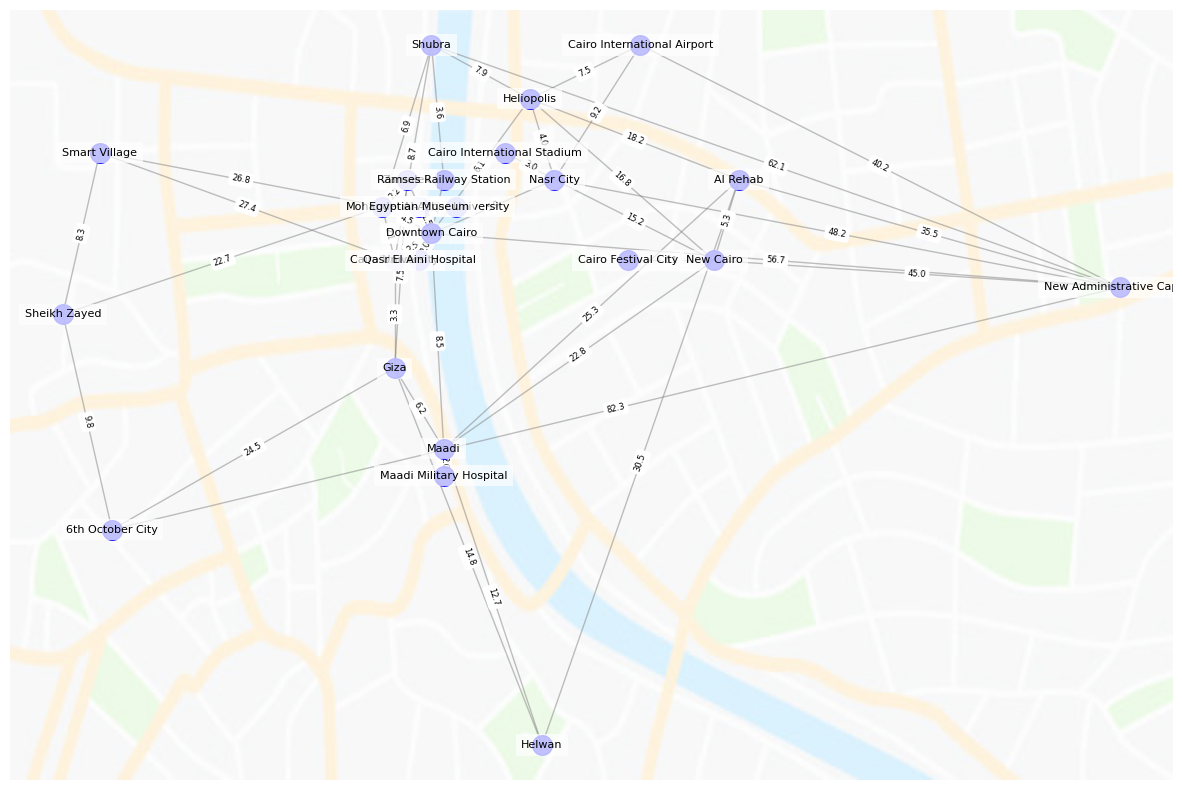

In [24]:
#cell 8:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Section 1: Create an undirected graph for the roads
G = nx.Graph()

# Section 2: Add nodes from nodes_df with scaled positions to reduce clustering
scale_factor = 50  # Scaling factor to spread out nodes
for _, node in nodes_df.iterrows():
    node_type = node.get('Type', 'Unknown')  # Default value if 'Type' is missing
    # Scale the X and Y coordinates to increase spacing
    scaled_pos = (node['X'] * scale_factor, node['Y'] * scale_factor)
    G.add_node(node['ID'], name=node['Name'], type=node_type, pos=scaled_pos)
    print(f"Node {node['ID']}: {G.nodes[node['ID']]}")

# Section 3: Check for missing nodes in roads_df
all_node_ids = set(nodes_df['ID'])
missing_nodes = set()

# Check existing roads
print("Checking existing roads (roads_df):")
for _, road in roads_df.iterrows():
    from_id = str(road['FromID'])  # Convert to string
    to_id = str(road['ToID'])      # Convert to string
    if from_id not in all_node_ids:
        missing_nodes.add(from_id)
        print(f"Node {from_id} not found in nodes_df (from roads_df: FromID)")
    if to_id not in all_node_ids:
        missing_nodes.add(to_id)
        print(f"Node {to_id} not found in nodes_df (from roads_df: ToID)")

# Check proposed roads
print("Checking proposed roads (proposed_roads_df):")
# Verify column names in proposed_roads_df
print("Columns in proposed_roads_df:", proposed_roads_df.columns.tolist())

# Ensure 'FromID' and 'ToID' columns exist
if 'FromID' not in proposed_roads_df.columns or 'ToID' not in proposed_roads_df.columns:
    raise KeyError("Columns 'FromID' or 'ToID' not found in proposed_roads_df! Check column names.")

for _, road in proposed_roads_df.iterrows():
    from_id = str(road['FromID'])  # Convert to string
    to_id = str(road['ToID'])      # Convert to string
    if from_id not in all_node_ids:
        missing_nodes.add(from_id)
        print(f"Node {from_id} not found in nodes_df (from proposed_roads_df: FromID)")
    if to_id not in all_node_ids:
        missing_nodes.add(to_id)
        print(f"Node {to_id} not found in nodes_df (from proposed_roads_df: ToID)")

# Section 4: Add missing nodes with default attributes (if any)
if missing_nodes:
    print("Missing nodes:", missing_nodes)
    for node_id in missing_nodes:
        print(f"Warning: Node {node_id} not found in nodes_df, adding with default attributes.")
        G.add_node(node_id, name=f"Unknown_{node_id}", type="Unknown", pos=(0, 0))
else:
    print("No missing nodes!")

# Section 5: Add edges for existing roads
for _, road in roads_df.iterrows():
    from_id = str(road['FromID'])
    to_id = str(road['ToID'])
    G.add_edge(from_id, to_id,
               distance=road['Distance(km)'],
               capacity=road['Current Capacity(vehicles/hour)'],
               condition=road['Condition(1-10)'])
    print(f"Added edge between {from_id} and {to_id}: distance={road['Distance(km)']}")

# Section 6: Create a separate graph for both existing and proposed roads
G_full = G.copy()
for _, road in proposed_roads_df.iterrows():
    from_id = str(road['FromID'])
    to_id = str(road['ToID'])
    if from_id not in all_node_ids or to_id not in all_node_ids:
        print(f"Skipping edge between {from_id} and {to_id} due to missing nodes")
        continue
    G_full.add_edge(from_id, to_id,
                    distance=road['Distance(km)'],
                    capacity=road['Estimated Capacity(vehicles/hour)'],
                    cost=road['Construction Cost(Million EGP)'])
    # Get names for printing (optional)
    from_name = next((node['Name'] for _, node in nodes_df.iterrows() if node['ID'] == from_id), f"Unknown_{from_id}")
    to_name = next((node['Name'] for _, node in nodes_df.iterrows() if node['ID'] == to_id), f"Unknown_{to_id}")
    print(f"Added proposed edge between {from_name} ({from_id}) and {to_name} ({to_id}): distance={road['Distance(km)']}")

# Section 7: Verify the graphs
print(f"Number of nodes in G: {G.number_of_nodes()}")
print(f"Number of edges in G: {G.number_of_edges()}")
print(f"Number of nodes in G_full: {G_full.number_of_nodes()}")
print(f"Number of edges in G_full: {G_full.number_of_edges()}")

# Check for missing 'type' attributes in nodes
missing_type_nodes = []
for node in G.nodes(data=True):
    if 'type' not in node[1]:
        missing_type_nodes.append(node[0])
if missing_type_nodes:
    print("Nodes missing 'type' attribute:", missing_type_nodes)
else:
    print("All nodes have the 'type' attribute")

# Section 8: Extract scaled positions for plotting
pos = nx.get_node_attributes(G_full, 'pos')

# Section 9: Create the plot
plt.figure(figsize=(15, 10))  # Set figure size

# Add a background image (landscape effect), with error handling
try:
    plt.imshow(plt.imread('landscape_background.jpg'), extent=[-5 * scale_factor, 105 * scale_factor, -5 * scale_factor, 105 * scale_factor], aspect='auto', alpha=0.3)
except FileNotFoundError:
    print("Background image 'landscape_background.jpg' not found. Proceeding without background.")

# Draw all edges (existing and proposed roads)
nx.draw_networkx_edges(G_full, pos, edge_color='gray', alpha=0.5)

# Draw edge labels (distances)
edge_labels = nx.get_edge_attributes(G_full, 'distance')
nx.draw_networkx_edge_labels(G_full, pos, edge_labels=edge_labels, font_size=6)  # Smaller font size for edge labels

# Draw nodes (cities) with smaller size to reduce overlap
nx.draw_networkx_nodes(G_full, pos, node_color='blue', node_size=200, alpha=0.8)  # Smaller node size

# Draw labels (city names) with a smaller font size and background box
labels = nx.get_node_attributes(G_full, 'name')
nx.draw_networkx_labels(G_full, pos, labels, font_size=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))  # Smaller font size for node labels

# Set plot limits with extra padding, scaled according to the scale factor
plt.xlim(-5 * scale_factor, 105 * scale_factor)
plt.ylim(-5 * scale_factor, 105 * scale_factor)

# Remove axes
plt.axis('off')

# Save the plot to a file (as per matplotlib guidelines)
plt.savefig('graph_with_distances_and_background.png')

In [54]:
#cell 9:
# التحقق من تناسق البيانات
# 1. التحقق من أن كل عقدة لها موقع (pos)
missing_pos = [node for node in G.nodes() if 'pos' not in G.nodes[node]]
if missing_pos:
    print("العقد التي تفتقد الموقع (pos):", missing_pos)
else:
    print("كل العقد لها موقع (pos)")

# 2. التحقق من أن كل عقدة لها نوع (type)
missing_type = [node for node in G.nodes() if 'type' not in G.nodes[node]]
if missing_type:
    print("العقد التي تفتقد السمة 'type':", missing_type)
else:
    print("كل العقد لها نوع (type)")

# 3. التحقق من أن كل حافة لها مسافة (distance)
missing_distance = [edge for edge in G.edges() if 'distance' not in G.edges[edge]]
if missing_distance:
    print("الحواف التي تفتقد المسافة (distance):", missing_distance)
else:
    print("كل الحواف لها مسافة (distance)")

# 4. التحقق من وجود عقد معزولة
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    print("العقد المعزولة (غير متصلة):", isolated_nodes)
else:
    print("لا توجد عقد معزولة")

كل العقد لها موقع (pos)
كل العقد لها نوع (type)
كل الحواف لها مسافة (distance)
العقد المعزولة (غير متصلة): ['F3', 'F4', 'F5', 'F6', 'F9', 'F10']


In [32]:
#cell10 :graph Visualiztion with Shortest Path and Landscape background

!pip install gradio
import gradio as gr
import heapq
import matplotlib.pyplot as plt

# Node data with coordinates
node_data = {
    '1': {'name': 'Maadi', 'type': 'Residential', 'pos': (36.04651162790685, 42.30769230769241)},
    '2': {'name': 'Nasr City', 'type': 'Mixed', 'pos': (46.511627906976614, 80.76923076923035)},
    '3': {'name': 'Downtown Cairo', 'type': 'Business', 'pos': (34.88372093023225, 73.07692307692277)},
    '4': {'name': 'New Cairo', 'type': 'Residential', 'pos': (61.62790697674395, 69.23076923076965)},
    '5': {'name': 'Heliopolis', 'type': 'Mixed', 'pos': (44.18604651162782, 92.3076923076924)},
    '6': {'name': 'Zamalek', 'type': 'Residential', 'pos': (32.55813953488346, 80.76923076923035)},
    '7': {'name': '6th October City', 'type': 'Mixed', 'pos': (4.651162790697579, 30.769230769230347)},
    '8': {'name': 'Giza', 'type': 'Mixed', 'pos': (31.395348837209276, 53.84615384615311)},
    '9': {'name': 'Mohandessin', 'type': 'Business', 'pos': (30.23255813953467, 76.92307692307723)},
    '10': {'name': 'Dokki', 'type': 'Mixed', 'pos': (31.395348837209276, 69.23076923076965)},
    '11': {'name': 'Shubra', 'type': 'Residential', 'pos': (34.88372093023225, 100.0)},
    '12': {'name': 'Helwan', 'type': 'Industrial', 'pos': (45.348837209302005, 0.0)},
    '13': {'name': 'New Administrative Capital', 'type': 'Government', 'pos': (100.0, 65.38461538461517)},
    '14': {'name': 'Al Rehab', 'type': 'Residential', 'pos': (63.953488372092735, 80.76923076923035)},
    '15': {'name': 'Sheikh Zayed', 'type': 'Residential', 'pos': (0.0, 61.538461538462066)},
    'F1': {'name': 'Cairo International Airport', 'type': 'Airport', 'pos': (54.65116279069758, 100.0)},
    'F2': {'name': 'Ramses Railway Station', 'type': 'Transit Hub', 'pos': (36.04651162790685, 80.76923076923035)},
    'F3': {'name': 'Cairo University', 'type': 'Education', 'pos': (31.395348837209276, 69.23076923076965)},
    'F4': {'name': 'Al-Azhar University', 'type': 'Education', 'pos': (37.20930232558145, 76.92307692307723)},
    'F5': {'name': 'Egyptian Museum', 'type': 'Tourism', 'pos': (33.72093023255806, 76.92307692307723)},
    'F6': {'name': 'Cairo International Stadium', 'type': 'Sports', 'pos': (41.86046511627903, 84.61538461538483)},
    'F7': {'name': 'Smart Village', 'type': 'Business', 'pos': (3.4883720930229773, 84.61538461538483)},
    'F8': {'name': 'Cairo Festival City', 'type': 'Commercial', 'pos': (53.488372093022974, 69.23076923076965)},
    'F9': {'name': 'Qasr El Aini Hospital', 'type': 'Medical', 'pos': (33.72093023255806, 69.23076923076965)},
    'F10': {'name': 'Maadi Military Hospital', 'type': 'Medical', 'pos': (36.04651162790685, 38.461538461537934)}
}

# Edge data (distances)
distances_dict = {
    '1-3': 8.5, '1-8': 6.2, '2-3': 5.9, '2-5': 4.0, '3-5': 6.1, '3-6': 3.2,
    '3-9': 4.5, '3-10': 3.8, '4-2': 15.2, '4-14': 5.3, '5-11': 7.9, '6-9': 2.2,
    '7-8': 24.5, '7-15': 9.8, '8-10': 3.3, '8-12': 14.8, '9-10': 2.1, '10-11': 8.7,
    '11-F2': 3.6, '12-1': 12.7, '13-4': 45.0, '14-13': 35.5, '15-7': 9.8, 'F1-5': 7.5,
    'F1-2': 9.2, 'F2-3': 2.5, 'F7-15': 8.3, 'F8-4': 6.1, '1-4': 22.8, '1-14': 25.3,
    '2-13': 48.2, '3-13': 56.7, '5-4': 16.8, '6-8': 7.5, '7-13': 82.3, '9-11': 6.9,
    '10-F7': 27.4, '11-13': 62.1, '12-14': 30.5, '14-5': 18.2, '15-9': 22.7, 'F1-13': 40.2,
    'F7-9': 26.8, 'F3-3': 2.5, 'F6-2': 3.0, 'F5-3': 1.5, 'F10-1': 2.0, 'F9-3': 2.0
}

# Costs (assumed: 1 EGP per km)
costs_dict = {key: distance for key, distance in distances_dict.items()}

# Traffic flow data
traffic_flow = {
    '1-3': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 800},
    '1-8': {'morning': 2200, 'afternoon': 1200, 'evening': 2100, 'night': 600},
    '2-3': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 700},
    '2-5': {'morning': 3000, 'afternoon': 1600, 'evening': 2800, 'night': 650},
    '3-5': {'morning': 3200, 'afternoon': 1700, 'evening': 3100, 'night': 800},
    '3-6': {'morning': 1800, 'afternoon': 1400, 'evening': 1900, 'night': 500},
    '3-9': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 550},
    '3-10': {'morning': 2300, 'afternoon': 1200, 'evening': 2100, 'night': 500},
    '4-2': {'morning': 3600, 'afternoon': 1800, 'evening': 3300, 'night': 750},
    '4-14': {'morning': 2800, 'afternoon': 1600, 'evening': 2600, 'night': 600},
    '5-11': {'morning': 2900, 'afternoon': 1500, 'evening': 2700, 'night': 650},
    '6-9': {'morning': 1700, 'afternoon': 1300, 'evening': 1800, 'night': 450},
    '7-8': {'morning': 3200, 'afternoon': 1700, 'evening': 3000, 'night': 700},
    '7-15': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '8-10': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    '8-12': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 500},
    '9-10': {'morning': 1800, 'afternoon': 1200, 'evening': 1700, 'night': 400},
    '10-11': {'morning': 2200, 'afternoon': 1300, 'evening': 2100, 'night': 500},
    '11-F2': {'morning': 2100, 'afternoon': 1200, 'evening': 2000, 'night': 450},
    '12-1': {'morning': 2600, 'afternoon': 1400, 'evening': 2400, 'night': 550},
    '13-4': {'morning': 3800, 'afternoon': 2000, 'evening': 3500, 'night': 800},
    '14-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '15-7': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    'F1-5': {'morning': 3300, 'afternoon': 2200, 'evening': 3100, 'night': 1200},
    'F1-2': {'morning': 3000, 'afternoon': 2000, 'evening': 2800, 'night': 1100},
    'F2-3': {'morning': 1900, 'afternoon': 1600, 'evening': 1800, 'night': 900},
    'F7-15': {'morning': 2600, 'afternoon': 1500, 'evening': 2400, 'night': 550},
    'F8-4': {'morning': 2800, 'afternoon': 1600, 'evening': 2600, 'night': 600},
    '1-4': {'morning': 2500, 'afternoon': 1300, 'evening': 2300, 'night': 600},
    '1-14': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 650},
    '2-13': {'morning': 3500, 'afternoon': 1800, 'evening': 3200, 'night': 700},
    '3-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '5-4': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '6-8': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    '7-13': {'morning': 4000, 'afternoon': 2000, 'evening': 3700, 'night': 800},
    '9-11': {'morning': 2200, 'afternoon': 1300, 'evening': 2100, 'night': 500},
    '10-F7': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '11-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '12-14': {'morning': 3000, 'afternoon': 1600, 'evening': 2800, 'night': 650},
    '14-5': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 600},
    '15-9': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 550},
    'F1-13': {'morning': 3200, 'afternoon': 1700, 'evening': 3000, 'night': 700},
    'F7-9': {'morning': 2600, 'afternoon': 1400, 'evening': 2400, 'night': 600},
    'F3-3': {'morning': 1800, 'afternoon': 1200, 'evening': 1700, 'night': 400},
    'F6-2': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    'F5-3': {'morning': 1900, 'afternoon': 1000, 'evening': 1800, 'night': 400},
    'F10-1': {'morning': 2200, 'afternoon': 1200, 'evening': 2100, 'night': 500},
    'F9-3': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450}
}

# Build the graph
class Graph:
    def __init__(self):
        self.nodes = node_data
        self.edges = {}
        for node in self.nodes:
            self.edges[node] = {}

    def add_edge(self, from_node, to_node, distance):
        if from_node in self.nodes and to_node in self.nodes:
            key = f"{from_node}-{to_node}"
            cost = costs_dict.get(key, distance)
            self.edges[from_node][to_node] = {'distance': distance, 'cost': cost}
            self.edges[to_node][from_node] = {'distance': distance, 'cost': cost}

    def neighbors(self, node):
        return list(self.edges[node].keys())

# Create the graph
G_full = Graph()
for edge, distance in distances_dict.items():
    from_node, to_node = edge.split('-')
    G_full.add_edge(from_node, to_node, distance)

# Calculate travel time based on traffic
def calculate_travel_time(from_node, to_node, current_arrival_time):
    key = f"{from_node}-{to_node}"
    if key not in traffic_flow:
        key = f"{to_node}-{from_node}"
    if key not in traffic_flow:
        return 10  # Default time

    period = 'morning' if 420 <= current_arrival_time % 1440 < 600 else 'afternoon' if 600 <= current_arrival_time % 1440 < 960 else 'evening' if 960 <= current_arrival_time % 1440 < 1200 else 'night'
    flow = traffic_flow[key][period]
    distance = distances_dict.get(key, 5.0)
    base_speed = 60  # km/h (increased speed)
    speed = base_speed / (1 + (flow / 1000))  # Adjust speed more realistically
    speed = max(10, speed)  # Minimum speed (increased minimum)
    return (distance / speed) * 60  # Time in minutes

# Calculate combined weight (time + cost)
def calculate_combined_weight(travel_time, cost, time_weight=0.7, cost_weight=0.3):
    return time_weight * travel_time + cost_weight * cost

# Modified Dijkstra with time, cost, and path length
def modified_dijkstra_with_cost(graph, start, end, start_time=420):
    combined_weights = {node: float('inf') for node in graph.nodes}
    times = {node: float('inf') for node in graph.nodes}
    costs = {node: float('inf') for node in graph.nodes}
    distances = {node: float('inf') for node in graph.nodes}
    previous = {node: None for node in graph.nodes}
    combined_weights[start] = 0
    times[start] = 0
    costs[start] = 0
    distances[start] = 0
    arrival_times = {node: float('inf') for node in graph.nodes}
    arrival_times[start] = start_time

    queue = [(0, start)]
    while queue:
        current_weight, current_node = heapq.heappop(queue)
        if current_weight > combined_weights[current_node]:
            continue

        current_arrival_time = arrival_times[current_node]
        current_time = times[current_node]
        current_cost = costs[current_node]
        current_distance = distances[current_node]

        for neighbor in graph.neighbors(current_node):
            travel_time = calculate_travel_time(current_node, neighbor, current_arrival_time)
            travel_cost = graph.edges[current_node][neighbor]['cost']
            travel_distance = graph.edges[current_node][neighbor]['distance']
            combined_weight = calculate_combined_weight(travel_time, travel_cost)

            new_weight = current_weight + combined_weight
            new_time = current_time + travel_time
            new_cost = current_cost + travel_cost
            new_distance = current_distance + travel_distance

            if new_weight < combined_weights[neighbor]:
                combined_weights[neighbor] = new_weight
                times[neighbor] = new_time
                costs[neighbor] = new_cost
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                arrival_times[neighbor] = (current_arrival_time + travel_time) % 1440
                heapq.heappush(queue, (new_weight, neighbor))

    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous[current]

    if combined_weights[end] == float('inf'):
        return None, float('inf'), float('inf'), float('inf')

    return path, times[end], costs[end], distances[end]

# Function to plot the graph with the shortest path and background
def plot_graph(graph, path):
    plt.figure(figsize=(12, 8))

    # Add the background image with error handling
    try:
        plt.imshow(plt.imread('landscape_background.jpg'), extent=[-5, 105, -5, 105], aspect='auto', alpha=0.3)
    except FileNotFoundError:
        print("Background image 'landscape_background.jpg' not found. Proceeding without background.")

    # Plot nodes
    for node, data in graph.nodes.items():
        x, y = data['pos']
        plt.scatter(x, y, c='blue', s=100)
        plt.text(x + 2, y + 2, data['name'], fontsize=8)

    # Plot edges
    for edge in distances_dict:
        from_node, to_node = edge.split('-')
        x1, y1 = graph.nodes[from_node]['pos']
        x2, y2 = graph.nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)

    # Highlight the shortest path in red
    if path:
        for i in range(len(path) - 1):
            from_node = path[i]
            to_node = path[i + 1]
            x1, y1 = graph.nodes[from_node]['pos']
            x2, y2 = graph.nodes[to_node]['pos']
            plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

    # Add title and labels
    plt.title("Shortest Path Between Cities")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)

    # Save the plot
    plt.savefig('shortest_path.png')
    plt.close()
    return 'shortest_path.png'

# Gradio interface function
def find_shortest_path(start_node, end_node, start_time):
    start_time_minutes = {
        'Morning (7:00 AM)': 420,
        'Afternoon (10:00 AM)': 600,
        'Evening (4:00 PM)': 960,
        'Night (10:00 PM)': 1320
    }[start_time]

    path, total_time, total_cost, total_distance = modified_dijkstra_with_cost(G_full, start_node, end_node, start_time_minutes)

    if path:
        path_names = [G_full.nodes[node]['name'] for node in path]
        result = f"Shortest path from {G_full.nodes[start_node]['name']} to {G_full.nodes[end_node]['name']}:\n"
        result += " -> ".join(path_names) + "\n"
        result += f"Total time: {total_time:.2f} minutes\n"
        result += f"Total distance: {total_distance:.2f} km\n"
        plot_path = plot_graph(G_full, path)
        return result, plot_path
    else:
        return f"No path exists between {G_full.nodes[start_node]['name']} and {G_full.nodes[end_node]['name']}.", None

# Create node names for dropdown menus
node_names = {node: data['name'] for node, data in node_data.items()}
node_ids = list(node_names.keys())
node_labels = [node_names[node] for node in node_ids]

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Shortest Path Finder")
    gr.Markdown("Find the shortest path between two locations in Cairo, considering traffic flow.")

    with gr.Row():
        start_node = gr.Dropdown(choices=list(zip(node_labels, node_ids)), label="Start Location")
        end_node = gr.Dropdown(choices=list(zip(node_labels, node_ids)), label="End Location")
        start_time = gr.Dropdown(choices=['Morning (7:00 AM)', 'Afternoon (10:00 AM)', 'Evening (4:00 PM)', 'Night (10:00 PM)'], label="Start Time")

    submit_button = gr.Button("Find Path")

    output_text = gr.Textbox(label="Path Details")
    output_image = gr.Image(label="Path Visualization")

    submit_button.click(
        fn=find_shortest_path,
        inputs=[start_node, end_node, start_time],
        outputs=[output_text, output_image]
    )

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://804cda3aaa846b769e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [40]:


#@#cell 11:

import gradio as gr
import matplotlib.pyplot as plt
import heapq
import math
import numpy as np
from PIL import Image, ImageFilter

# Contract data with coordinates
node_data = {
    '1': {'name': 'Maadi', 'type': 'Residential', 'pos': (36.04651162790685, 42.30769230769241)},
    '2': {'name': 'Nasr City', 'type': 'Mixed', 'pos': (46.511627906976614, 80.76923076923035)},
    '3': {'name': 'Downtown Cairo', 'type': 'Business', 'pos': (34.88372093023225, 73.07692307692277)},
    '4': {'name': 'New Cairo', 'type': 'Residential', 'pos': (61.62790697674395, 69.23076923076965)},
    '5': {'name': 'Heliopolis', 'type': 'Mixed', 'pos': (44.18604651162782, 92.3076923076924)},
    '6': {'name': 'Zamalek', 'type': 'Residential', 'pos': (32.55813953488346, 80.76923076923035)},
    '7': {'name': '6th October City', 'type': 'Mixed', 'pos': (4.651162790697579, 30.769230769230347)},
    '8': {'name': 'Giza', 'type': 'Mixed', 'pos': (31.395348837209276, 53.84615384615311)},
    '9': {'name': 'Mohandessin', 'type': 'Business', 'pos': (30.23255813953467, 76.92307692307723)},
    '10': {'name': 'Dokki', 'type': 'Mixed', 'pos': (31.395348837209276, 69.23076923076965)},
    '11': {'name': 'Shubra', 'type': 'Residential', 'pos': (34.88372093023225, 100.0)},
    '12': {'name': 'Helwan', 'type': 'Industrial', 'pos': (45.348837209302005, 0.0)},
    '13': {'name': 'New Administrative Capital', 'type': 'Government', 'pos': (100.0, 65.38461538461517)},
    '14': {'name': 'Al Rehab', 'type': 'Residential', 'pos': (63.953488372092735, 80.76923076923035)},
    '15': {'name': 'Sheikh Zayed', 'type': 'Residential', 'pos': (0.0, 61.538461538462066)},
    'F1': {'name': 'Cairo International Airport', 'type': 'Airport', 'pos': (54.65116279069758, 100.0)},
    'F2': {'name': 'Ramses Railway Station', 'type': 'Transit Hub', 'pos': (36.04651162790685, 80.76923076923035)},
    'F3': {'name': 'Cairo University', 'type': 'Education', 'pos': (31.395348837209276, 69.23076923076965)},
    'F4': {'name': 'Al-Azhar University', 'type': 'Education', 'pos': (37.20930232558145, 76.92307692307723)},
    'F5': {'name': 'Egyptian Museum', 'type': 'Tourism', 'pos': (33.72093023255806, 76.92307692307723)},
    'F6': {'name': 'Cairo International Stadium', 'type': 'Sports', 'pos': (41.86046511627903, 84.61538461538483)},
    'F7': {'name': 'Smart Village', 'type': 'Business', 'pos': (3.4883720930229773, 84.61538461538483)},
    'F8': {'name': 'Cairo Festival City', 'type': 'Commercial', 'pos': (53.488372093022974, 69.23076923076965)},
    'F9': {'name': 'Qasr El Aini Hospital', 'type': 'Medical', 'pos': (33.72093023255806, 69.23076923076965)},
    'F10': {'name': 'Maadi Military Hospital', 'type': 'Medical', 'pos': (36.04651162790685, 38.461538461537934)}
}

# Edge data
distances_dict = {
    '1-3': 8.5, '1-8': 6.2, '2-3': 5.9, '2-5': 4.0, '3-5': 6.1, '3-6': 3.2,
    '3-9': 4.5, '3-10': 3.8, '4-2': 15.2, '4-14': 5.3, '5-11': 7.9, '6-9': 2.2,
    '7-8': 24.5, '7-15': 9.8, '8-10': 3.3, '8-12': 14.8, '9-10': 2.1, '10-11': 8.7,
    '11-F2': 3.6, '12-1': 12.7, '13-4': 45.0, '14-13': 35.5, '15-7': 9.8, 'F1-5': 7.5,
    'F1-2': 9.2, 'F2-3': 2.5, 'F7-15': 8.3, 'F8-4': 6.1, '1-4': 22.8, '1-14': 25.3,
    '2-13': 48.2, '3-13': 56.7, '5-4': 16.8, '6-8': 7.5, '7-13': 82.3, '9-11': 6.9,
    '10-F7': 27.4, '11-13': 62.1, '12-14': 30.5, '14-5': 18.2, '15-9': 22.7, 'F1-13': 40.2,
    'F7-9': 26.8, 'F3-3': 2.5, 'F6-2': 3.0, 'F5-3': 1.5, 'F10-1': 2.0, 'F9-3': 2.0
}

#Traffic data
traffic_flow = {
    '1-3': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 800},
    '1-8': {'morning': 2200, 'afternoon': 1200, 'evening': 2100, 'night': 600},
    '2-3': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 700},
    '2-5': {'morning': 3000, 'afternoon': 1600, 'evening': 2800, 'night': 650},
    '3-5': {'morning': 3200, 'afternoon': 1700, 'evening': 3100, 'night': 800},
    '3-6': {'morning': 1800, 'afternoon': 1400, 'evening': 1900, 'night': 500},
    '3-9': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 550},
    '3-10': {'morning': 2300, 'afternoon': 1200, 'evening': 2100, 'night': 500},
    '4-2': {'morning': 3600, 'afternoon': 1800, 'evening': 3300, 'night': 750},
    '4-14': {'morning': 2800, 'afternoon': 1600, 'evening': 2600, 'night': 600},
    '5-11': {'morning': 2900, 'afternoon': 1500, 'evening': 2700, 'night': 650},
    '6-9': {'morning': 1700, 'afternoon': 1300, 'evening': 1800, 'night': 450},
    '7-8': {'morning': 3200, 'afternoon': 1700, 'evening': 3000, 'night': 700},
    '7-15': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '8-10': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    '8-12': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 500},
    '9-10': {'morning': 1800, 'afternoon': 1200, 'evening': 1700, 'night': 400},
    '10-11': {'morning': 2200, 'afternoon': 1300, 'evening': 2100, 'night': 500},
    '11-F2': {'morning': 2100, 'afternoon': 1200, 'evening': 2000, 'night': 450},
    '12-1': {'morning': 2600, 'afternoon': 1400, 'evening': 2400, 'night': 550},
    '13-4': {'morning': 3800, 'afternoon': 2000, 'evening': 3500, 'night': 800},
    '14-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '15-7': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    'F1-5': {'morning': 3300, 'afternoon': 2200, 'evening': 3100, 'night': 1200},
    'F1-2': {'morning': 3000, 'afternoon': 2000, 'evening': 2800, 'night': 1100},
    'F2-3': {'morning': 1900, 'afternoon': 1600, 'evening': 1800, 'night': 900},
    'F7-15': {'morning': 2600, 'afternoon': 1500, 'evening': 2400, 'night': 550},
    'F8-4': {'morning': 2800, 'afternoon': 1600, 'evening': 2600, 'night': 600}
}

# Identify medical contracts
medical_nodes = [node for node, data in node_data.items() if data['type'] == 'Medical']

# Calculate average traffic values ​​for each periodaverage_traffic = {
    period: sum(data[period] for data in traffic_flow.values()) / len(traffic_flow)
    for period in ['morning', 'afternoon', 'evening', 'night']
}

#Build the Graph
class Graph:
    def __init__(self):
        self.nodes = node_data
        self.edges = {}
        for node in self.nodes:
            self.edges[node] = {}

    def add_edge(self, from_node, to_node, distance):
        if from_node in self.nodes and to_node in self.nodes:
            key = f"{from_node}-{to_node}"
            self.edges[from_node][to_node] = {'distance': distance}
            self.edges[to_node][from_node] = {'distance': distance}

    def neighbors(self, node):
        return list(self.edges[node].keys())

# Create theGraph
G_full = Graph()
for edge, distance in distances_dict.items():
    from_node, to_node = edge.split('-')
    G_full.add_edge(from_node, to_node, distance)

# Heuristic function with priority for hospitals
def heuristic(node, goal, graph, medical_priority_factor=0.5):
    x1, y1 = graph.nodes[node]['pos']
    x2, y2 = graph.nodes[goal]['pos']
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    if node in medical_nodes:
        distance *= medical_priority_factor
    return distance

# Calculate travel time based on traffic
def calculate_travel_time(from_node, to_node, current_time):
    key = f"{from_node}-{to_node}"
    if key not in traffic_flow:
        key = f"{to_node}-{from_node}"

    period = 'morning' if 420 <= current_time % 1440 < 600 else 'afternoon' if 600 <= current_time % 1440 < 960 else 'evening' if 960 <= current_time % 1440 < 1200 else 'night'
    distance = distances_dict.get(key, 5.0)

    if key not in traffic_flow:
        flow = average_traffic[period]
    else:
        flow = traffic_flow[key][period]

    base_speed = 70  # km/h
    speed = base_speed / (1 + (flow / 1000))
    speed = max(15, speed)  # Minimum speed

    return (distance / speed) * 60  # Time in minutes

# Weight calculation with priority for hospitals
def calculate_combined_weight(travel_time, current_node, medical_priority_factor=0.5):
    weight = travel_time
    if current_node in medical_nodes:
        weight *= medical_priority_factor
    return weight

# Find the nearest hospital
def find_nearest_hospital(graph, start, start_time=420):
    min_time = float('inf')
    nearest_hospital = None
    hospital_path = None

    for hospital in medical_nodes:
        path, total_time, total_distance = a_star(graph, start, hospital, start_time)
        if path and total_time < min_time:
            min_time = total_time
            nearest_hospital = hospital
            hospital_path = path

    return hospital_path, min_time, nearest_hospital

#A* implementation with priority for hospitals
def a_star(graph, start, end, start_time=420):
    if end not in medical_nodes:
        hospital_path, hospital_time, nearest_hospital = find_nearest_hospital(graph, start, start_time)
        if hospital_path:
            path = hospital_path
            total_time = hospital_time
            total_distance = 0
            for i in range(len(path) - 1):
                key = f"{path[i]}-{path[i+1]}"
                if key in distances_dict:
                    total_distance += distances_dict[key]
                else:
                    key = f"{path[i+1]}-{path[i]}"
                    total_distance += distances_dict[key]
            return path, total_time, total_distance

    combined_weights = {node: float('inf') for node in graph.nodes}
    times = {node: float('inf') for node in graph.nodes}
    distances = {node: float('inf') for node in graph.nodes}
    previous = {node: None for node in graph.nodes}
    f_scores = {node: float('inf') for node in graph.nodes}
    combined_weights[start] = 0
    times[start] = 0
    distances[start] = 0
    f_scores[start] = heuristic(start, end, graph)
    arrival_times = {node: float('inf') for node in graph.nodes}
    arrival_times[start] = start_time

    queue = [(f_scores[start], 0, start)]
    while queue:
        f_score, current_weight, current_node = heapq.heappop(queue)
        if current_node == end:
            break
        if current_weight > combined_weights[current_node]:
            continue

        current_arrival_time = arrival_times[current_node]
        current_time = times[current_node]
        current_distance = distances[current_node]

        for neighbor in graph.neighbors(current_node):
            travel_time = calculate_travel_time(current_node, neighbor, current_arrival_time)
            travel_distance = graph.edges[current_node][neighbor]['distance']
            combined_weight = calculate_combined_weight(travel_time, neighbor)
            g_score = current_weight + combined_weight

            new_time = current_time + travel_time
            new_distance = current_distance + travel_distance

            if g_score < combined_weights[neighbor]:
                combined_weights[neighbor] = g_score
                times[neighbor] = new_time
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                arrival_times[neighbor] = (current_arrival_time + travel_time) % 1440
                f_scores[neighbor] = g_score + heuristic(neighbor, end, graph)
                heapq.heappush(queue, (f_scores[neighbor], g_score, neighbor))

    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous[current]

    if combined_weights[end] == float('inf'):
        return None, float('inf'), float('inf')

    return path, times[end], distances[end]

# Function to draw a graph with path highlighting and background
def plot_graph(graph, path):
    plt.figure(figsize=(12, 8))

# Download background image
    try:
        background_image = Image.open('landscape_background.jpg')
        background_image = np.array(background_image)
        plt.imshow(background_image, aspect='auto', extent=[-10, 110, -10, 110], zorder=0)
    except FileNotFoundError:
        print("Background image 'landscape_background.jpg' not found. Proceeding without background.")
        plt.gca().set_facecolor('white')

# nodes drawing
    for node, data in graph.nodes.items():
        x, y = data['pos']
        if node in medical_nodes:
            plt.scatter(x, y, c='red', s=100, label='Medical' if 'Medical' not in plt.gca().get_legend_handles_labels()[1] else "", zorder=2)
        else:
            plt.scatter(x, y, c='blue', s=100, label='Other' if 'Other' not in plt.gca().get_legend_handles_labels()[1] else "", zorder=2)
        plt.text(x + 2, y + 2, data['name'], fontsize=8, zorder=3)

#drawing edges
    for edge in distances_dict:
        from_node, to_node = edge.split('-')
        x1, y1 = graph.nodes[from_node]['pos']
        x2, y2 = graph.nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, zorder=1)

    #Drawing the path
    if path:
        for i in range(len(path) - 1):
            from_node = path[i]
            to_node = path[i + 1]
            x1, y1 = graph.nodes[from_node]['pos']
            x2, y2 = graph.nodes[to_node]['pos']
            plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2, label='Emergency Path' if i == 0 else "", zorder=2)

    # Title and Axis Settings
    plt.title("Emergency Path to Hospital")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True, zorder=1, alpha=0.5)
    plt.xlim(-10, 110)
    plt.ylim(-10, 110)

   # Save image
    plt.savefig('emergency_path.png', bbox_inches='tight')
    plt.close()
    return 'emergency_path.png'

# Main function of the interface
def find_and_plot_emergency_path(start_node, end_node, start_time):
    try:
        start_time_minutes = {
            'Morning (7:00 AM)': 420,
            'Afternoon (10:00 AM)': 600,
            'Evening (4:00 PM)': 960,
            'Night (10:00 PM)': 1320
        }[start_time]

        path, total_time, total_distance = a_star(G_full, start_node, end_node, start_time_minutes)

        if path:
            plot_path = plot_graph(G_full, path)
            path_names = [G_full.nodes[node]['name'] for node in path]
            nearest_hospital = next((node for node in path if node in medical_nodes), None)

            result_text = ""
            if nearest_hospital and end_node not in medical_nodes:
                result_text += f"Redirected to nearest hospital: {G_full.nodes[nearest_hospital]['name']}\n\n"

            result_text += f"Emergency vehicle path from {G_full.nodes[start_node]['name']}:\n"
            result_text += " -> ".join(path_names) + "\n\n"
            result_text += f"Total time: {total_time:.2f} minutes\n"
            result_text += f"Total distance: {total_distance:.2f} km"

            return result_text, plot_path
        else:
            return f"No path available between {G_full.nodes[start_node]['name']} and {G_full.nodes[end_node]['name']}.", None
    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Create node names for the dropdown list
node_names = {node: data['name'] for node, data in node_data.items()}
node_ids = list(node_names.keys())
node_labels = [node_names[node] for node in node_ids]

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Emergency Vehicle Path Finder")
    gr.Markdown("This application helps find the optimal path for emergency vehicles to the nearest hospital, considering traffic flow and prioritizing medical nodes.")

    with gr.Row():
        start_node = gr.Dropdown(choices=list(zip(node_labels, node_ids)), label="Start Location", value='1')
        end_node = gr.Dropdown(choices=list(zip(node_labels, node_ids)), label="End Location", value='8')
        start_time = gr.Dropdown(choices=['Morning (7:00 AM)', 'Afternoon (10:00 AM)', 'Evening (4:00 PM)', 'Night (10:00 PM)'], label="Start Time", value='Night (10:00 PM)')

    submit_button = gr.Button("Find Optimal Path")

    output_text = gr.Textbox(label="Path Details", lines=6)
    output_image = gr.Image(label="Path Visualization")

    submit_button.click(
        fn=find_and_plot_emergency_path,
        inputs=[start_node, end_node, start_time],
        outputs=[output_text, output_image]
    )

    gr.Markdown("### Quick Examples:")
    examples = gr.Examples(
        examples=[
            ['1', 'F10', 'Morning (7:00 AM)'],
            ['2', 'F9', 'Evening (4:00 PM)'],
            ['15', 'F10', 'Afternoon (10:00 AM)']
        ],
        inputs=[start_node, end_node, start_time],
        outputs=[output_text, output_image],
        fn=find_and_plot_emergency_path,
        cache_examples=True
    )

demo.launch()

Caching examples at: '/content/.gradio/cached_examples/104'
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://14e83bf5a0642b1530.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [42]:

#cell 12:
#Kruskal using MST
!pip install gradio
import heapq
import matplotlib.pyplot as plt
import gradio as gr
import os
from PIL import Image
import numpy as np

# Area data (nodes) with coordinates
neighborhoods = {
    '1': {'name': 'Maadi', 'type': 'Residential', 'pos': (31.25, 29.96)},
    '2': {'name': 'Nasr City', 'type': 'Mixed', 'pos': (31.34, 30.06)},
    '3': {'name': 'Downtown Cairo', 'type': 'Business', 'pos': (31.24, 30.04)},
    '4': {'name': 'New Cairo', 'type': 'Residential', 'pos': (31.47, 30.03)},
    '5': {'name': 'Heliopolis', 'type': 'Mixed', 'pos': (31.32, 30.09)},
    '6': {'name': 'Zamalek', 'type': 'Residential', 'pos': (31.22, 30.06)},
    '7': {'name': '6th October City', 'type': 'Mixed', 'pos': (30.98, 29.93)},
    '8': {'name': 'Giza', 'type': 'Mixed', 'pos': (31.21, 29.99)},
    '9': {'name': 'Mohandessin', 'type': 'Business', 'pos': (31.20, 30.05)},
    '10': {'name': 'Dokki', 'type': 'Mixed', 'pos': (31.21, 30.03)},
    '11': {'name': 'Shubra', 'type': 'Residential', 'pos': (31.24, 30.11)},
    '12': {'name': 'Helwan', 'type': 'Industrial', 'pos': (31.33, 29.85)},
    '13': {'name': 'New Administrative Capital', 'type': 'Government', 'pos': (31.80, 30.02)},
    '14': {'name': 'Al Rehab', 'type': 'Residential', 'pos': (31.49, 30.06)},
    '15': {'name': 'Sheikh Zayed', 'type': 'Residential', 'pos': (30.94, 30.01)},
    'F1': {'name': 'Cairo International Airport', 'type': 'Airport', 'pos': (31.41, 30.11)},
    'F2': {'name': 'Ramses Railway Station', 'type': 'Transit Hub', 'pos': (31.25, 30.06)},
    'F3': {'name': 'Cairo University', 'type': 'Education', 'pos': (31.21, 30.03)},
    'F4': {'name': 'Al-Azhar University', 'type': 'Education', 'pos': (31.26, 30.05)},
    'F5': {'name': 'Egyptian Museum', 'type': 'Tourism', 'pos': (31.23, 30.05)},
    'F6': {'name': 'Cairo International Stadium', 'type': 'Sports', 'pos': (31.30, 30.07)},
    'F7': {'name': 'Smart Village', 'type': 'Business', 'pos': (30.97, 30.07)},
    'F8': {'name': 'Cairo Festival City', 'type': 'Commercial', 'pos': (31.40, 30.03)},
    'F9': {'name': 'Qasr El Aini Hospital', 'type': 'Medical', 'pos': (31.23, 30.03)},
    'F10': {'name': 'Maadi Military Hospital', 'type': 'Medical', 'pos': (31.25, 29.95)}
}

# Existing roads (maintenance cost with density)
existing_roads = [
    {'from': '1', 'to': '3', 'distance': 8.5, 'condition': 7, 'capacity': 3000},
    {'from': '1', 'to': '8', 'distance': 6.2, 'condition': 6, 'capacity': 2500},
    {'from': '2', 'to': '3', 'distance': 5.9, 'condition': 8, 'capacity': 2800},
    {'from': '2', 'to': '5', 'distance': 4.0, 'condition': 9, 'capacity': 3200},
    {'from': '3', 'to': '5', 'distance': 6.1, 'condition': 7, 'capacity': 3500},
    {'from': '3', 'to': '6', 'distance': 3.2, 'condition': 8, 'capacity': 2000},
    {'from': '3', 'to': '9', 'distance': 4.5, 'condition': 6, 'capacity': 2600},
    {'from': '3', 'to': '10', 'distance': 3.8, 'condition': 7, 'capacity': 2400},
    {'from': '4', 'to': '2', 'distance': 15.2, 'condition': 9, 'capacity': 3800},
    {'from': '4', 'to': '14', 'distance': 5.3, 'condition': 10, 'capacity': 3000},
    {'from': '5', 'to': '11', 'distance': 7.9, 'condition': 7, 'capacity': 3100},
    {'from': '6', 'to': '9', 'distance': 2.2, 'condition': 8, 'capacity': 1800},
    {'from': '7', 'to': '8', 'distance': 24.5, 'condition': 8, 'capacity': 3500},
    {'from': '7', 'to': '15', 'distance': 9.8, 'condition': 9, 'capacity': 3000},
    {'from': '8', 'to': '10', 'distance': 3.3, 'condition': 7, 'capacity': 2200},
    {'from': '8', 'to': '12', 'distance': 14.8, 'condition': 5, 'capacity': 2600},
    {'from': '9', 'to': '10', 'distance': 2.1, 'condition': 7, 'capacity': 1900},
    {'from': '10', 'to': '11', 'distance': 8.7, 'condition': 6, 'capacity': 2400},
    {'from': '11', 'to': 'F2', 'distance': 3.6, 'condition': 7, 'capacity': 2200},
    {'from': '12', 'to': '1', 'distance': 12.7, 'condition': 6, 'capacity': 2800},
    {'from': '13', 'to': '4', 'distance': 45.0, 'condition': 10, 'capacity': 4000},
    {'from': '14', 'to': '13', 'distance': 35.5, 'condition': 9, 'capacity': 3800},
    {'from': '15', 'to': '7', 'distance': 9.8, 'condition': 9, 'capacity': 3000},
    {'from': 'F1', 'to': '5', 'distance': 7.5, 'condition': 9, 'capacity': 3500},
    {'from': 'F1', 'to': '2', 'distance': 9.2, 'condition': 8, 'capacity': 3200},
    {'from': 'F2', 'to': '3', 'distance': 2.5, 'condition': 7, 'capacity': 2000},
    {'from': 'F7', 'to': '15', 'distance': 8.3, 'condition': 8, 'capacity': 2800},
    {'from': 'F8', 'to': '4', 'distance': 6.1, 'condition': 9, 'capacity': 3000}
]

# Proposed methods (construction cost with density)
potential_roads = [
    {'from': '1', 'to': '4', 'distance': 22.8, 'cost': 450, 'capacity': 4000},
    {'from': '1', 'to': '14', 'distance': 25.3, 'cost': 500, 'capacity': 3800},
    {'from': '2', 'to': '13', 'distance': 48.2, 'cost': 950, 'capacity': 4500},
    {'from': '3', 'to': '13', 'distance': 56.7, 'cost': 1100, 'capacity': 4500},
    {'from': '5', 'to': '4', 'distance': 16.8, 'cost': 320, 'capacity': 3500},
    {'from': '6', 'to': '8', 'distance': 7.5, 'cost': 150, 'capacity': 2500},
    {'from': '7', 'to': '13', 'distance': 82.3, 'cost': 1600, 'capacity': 4000},
    {'from': '9', 'to': '11', 'distance': 6.9, 'cost': 140, 'capacity': 2800},
    {'from': '10', 'to': 'F7', 'distance': 27.4, 'cost': 550, 'capacity': 3200},
    {'from': '11', 'to': '13', 'distance': 62.1, 'cost': 1250, 'capacity': 4200},
    {'from': '12', 'to': '14', 'distance': 30.5, 'cost': 610, 'capacity': 3600},
    {'from': '14', 'to': '5', 'distance': 18.2, 'cost': 360, 'capacity': 3300},
    {'from': '15', 'to': '9', 'distance': 22.7, 'cost': 450, 'capacity': 3000},
    {'from': 'F1', 'to': '13', 'distance': 40.2, 'cost': 800, 'capacity': 4000},
    {'from': 'F7', 'to': '9', 'distance': 26.8, 'cost': 540, 'capacity': 3200},
    {'from': 'F3', 'to': '3', 'distance': 2.5, 'cost': 50, 'capacity': 3000},
    {'from': 'F6', 'to': '2', 'distance': 3.0, 'cost': 60, 'capacity': 2800},
    {'from': 'F5', 'to': '3', 'distance': 1.5, 'cost': 30, 'capacity': 3200},
    {'from': 'F10', 'to': '1', 'distance': 2.0, 'cost': 40, 'capacity': 2500},
    {'from': 'F9', 'to': '3', 'distance': 2.0, 'cost': 45, 'capacity': 3100}
]

# Identify medical nodes
medical_nodes = [node for node, data in neighborhoods.items() if data['type'] == 'Medical']

# Union-Find Circuit Testing Framework
class UnionFind:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, node):
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]

    def union(self, node1, node2):
        root1 = self.find(node1)
        root2 = self.find(node2)
        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

    def connected(self, node1, node2):
        return self.find(node1) == self.find(node2)

# Kruskal's algorithm application
def kruskal(nodes, edges):
    edges.sort(key=lambda x: x['cost'])
    uf = UnionFind(nodes)
    mst = []
    total_cost = 0
    for edge in edges:
        from_node = edge['from']
        to_node = edge['to']
        cost = edge['cost']
        if not uf.connected(from_node, to_node):
            uf.union(from_node, to_node)
            mst.append(edge)
            total_cost += cost
    return mst, total_cost

# Function to draw a graph
def plot_graph(nodes, all_edges, mst_edges):
    plt.figure(figsize=(12, 8))

 # Add landscape background
    try:
        background_image = Image.open('landscape_background.jpg')  # تأكد من اسم وامتداد الصورة
        background_image = np.array(background_image)
        plt.imshow(background_image, aspect='auto', extent=[30.9, 31.9, 29.8, 30.2], zorder=0)  # تعديل extent بناءً على إحداثيات
    except FileNotFoundError:
        print("Background image 'landscape_background.jpg' not found. Proceeding without background.")
        plt.gca().set_facecolor('white')  # خلفية بيضاء افتراضية إذا لم يتم العثور على الصورة

   # nodes drawing
    for node, data in nodes.items():
        x, y = data['pos']
        color = 'red' if data['type'] == 'Medical' else 'blue'
        plt.scatter(x, y, c=color, s=100)
        plt.text(x + 0.01, y + 0.01, data['name'], fontsize=8)

#drawing edges
    for edge in all_edges:
        from_node = edge['from']
        to_node = edge['to']
        x1, y1 = nodes[from_node]['pos']
        x2, y2 = nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)

  # MST Edge Drawing
    for edge in mst_edges:
        from_node = edge['from']
        to_node = edge['to']
        x1, y1 = nodes[from_node]['pos']
        x2, y2 = nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

    plt.title("Transportation Network with Minimum Spanning Tree")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plot_path = 'mst_road_network.png'
    plt.savefig(plot_path)
    plt.close()
    return plot_path

# Create edge list
def generate_edges():
    edges = []
    scaling_factor = 1000
    for road in existing_roads:
        maintenance_cost = (10 - road['condition']) * road['distance']
        capacity = road['capacity']
        adjusted_cost = maintenance_cost + (capacity / scaling_factor)
        edges.append({
            'from': road['from'],
            'to': road['to'],
            'distance': road['distance'],
            'cost': adjusted_cost,
            'capacity': capacity
        })
    for road in potential_roads:
        cost = road['cost']
        capacity = road['capacity']
        adjusted_cost = cost + (capacity / scaling_factor)
        if road['from'] in medical_nodes or road['to'] in medical_nodes:
            adjusted_cost *= 0.5
        edges.append({
            'from': road['from'],
            'to': road['to'],
            'distance': road['distance'],
            'cost': adjusted_cost,
            'capacity': capacity
        })
    return edges

# Function to run the algorithm and display the results
def run_kruskal():
    edges = generate_edges()
    mst, total_cost = kruskal(neighborhoods.keys(), edges)
    output_text = "Minimum Spanning Tree (MST) Road Network:\n"
    for edge in mst:
        output_text += (f"{neighborhoods[edge['from']]['name']} -> {neighborhoods[edge['to']]['name']}: "
                        f"Distance = {edge['distance']} km, Cost = {edge['cost']:.2f} million EGP, Capacity = {edge['capacity']} vehicles/hour\n")
    output_text += f"Total Cost: {total_cost:.2f} million EGP"
    plot_path = plot_graph(neighborhoods, edges, mst)
    return plot_path, output_text

# Setting up the Gradio interface
with gr.Blocks() as interface:
    gr.Markdown("### Transportation Network Optimization")
    gr.Markdown("Click the button below to compute the Minimum Spanning Tree for the transportation network.")
    run_button = gr.Button("Run Kruskal's Algorithm")
    plot_output = gr.Image(label="MST Visualization")
    text_output = gr.Textbox(label="MST Details")
    run_button.click(fn=run_kruskal, outputs=[plot_output, text_output])

# Run the interface
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f622f403342764d1f4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [44]:
##cell 13

#Cairo's Public Transport(buses,metro) Optimization System: Route Planning, Vehcle Distribution, and Reducing travel Time

!pip install gradio matplotlib pandas numpy networkx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import gradio as gr
from collections import defaultdict, deque
import networkx as nx
import math

# Hardcoded CSV data
bus_routes_data = """RouteID,Stops,Buses Assigned,Daily Passengers
B1,"1,3,6,9",25,35000
B2,"7,15,8,10,3",30,42000
B3,"2,5,F1",20,28000
B4,"4,14,2,3",22,31000
B5,"8,12,1",18,25000
B6,"11,5,2",24,33000
B7,"13,4,14",15,21000
B8,"F7,15,7",12,17000
B9,"1,8,10,9,6",28,39000
B10,"F8,4,2,5",20,28000"""

metro_lines_data = """LineID,Name,Stations,Daily Passengers
M1,Line 1 (Helwan-New Marg),"12,1,3,F2,11",1500000
M2,Line 2 (Shubra-Giza),"11,F2,3,10,8",1200000
M3,Line 3 (Airport-Imbaba),"F1,5,2,3,9",800000"""

demand_data = """FromID,ToID,Daily Passengers
3,5,15000
1,3,12000
2,3,18000
F2,11,25000
F1,3,20000
7,3,14000
4,3,16000
8,3,22000
3,9,13000
5,2,17000
11,3,24000
12,3,11000
1,8,9000
7,F7,18000
4,F8,12000
13,3,8000
14,4,7000"""

traffic_flow_data = """RoadID,Morning Peak(veh/h),Afternoon(veh/h),Evening Peak(veh/h),Night(veh/h)
1-3,2800,1500,2600,800
1-8,2200,1200,2100,600
2-3,2700,1400,2500,700
2-5,3000,1600,2800,650
3-5,3200,1700,3100,800
3-6,1800,1400,1900,500
3-9,2400,1300,2200,550
3-10,2300,1200,2100,500
4-2,3600,1800,3300,750
4-14,2800,1600,2600,600
5-11,2900,1500,2700,650
6-9,1700,1300,1800,450
7-8,3200,1700,3000,700
7-15,2800,1500,2600,600
8-10,2000,1100,1900,450
8-12,2400,1300,2200,500
9-10,1800,1200,1700,400
10-11,2200,1300,2100,500
11-F2,2100,1200,2000,450
12-1,2600,1400,2400,550
13-4,3800,2000,3500,800
14-13,3600,1900,3300,750
15-7,2800,1500,2600,600
F1-5,3300,2200,3100,1200
F1-2,3000,2000,2800,1100
F2-3,1900,1600,1800,900
F7-15,2600,1500,2400,550
F8-4,2800,1600,2600,600"""

# Reading CSV data
bus_routes_df = pd.read_csv(StringIO(bus_routes_data))
metro_lines_df = pd.read_csv(StringIO(metro_lines_data))
demand_df = pd.read_csv(StringIO(demand_data))
traffic_df = pd.read_csv(StringIO(traffic_flow_data))

# Node names
node_names = {
    '1': 'Maadi', '2': 'Nasr City', '3': 'Downtown Cairo', '4': 'New Cairo',
    '5': 'Heliopolis', '6': 'Zamalek', '7': '6th October', '8': 'Giza',
    '9': 'Qasr El Aini Hospital', '10': 'Mohandessin', '11': 'Shubra',
    '12': 'Helwan', '13': 'Al Rehab', '14': 'Imbaba', '15': 'Sheikh Zayed',
    'F1': 'Airport', 'F2': 'New Marg', 'F7': 'Ain Shams', 'F8': 'Sheikh Zayed'
}

# Build graph from bus and metro routes
graph = defaultdict(list)
for _, row in bus_routes_df.iterrows():
    stops = row['Stops'].split(',')
    for i in range(len(stops) - 1):
        frm, to = stops[i], stops[i + 1]
        graph[frm].append(to)
        graph[to].append(frm)
for _, row in metro_lines_df.iterrows():
    stops = row['Stations'].split(',')
    for i in range(len(stops) - 1):
        frm, to = stops[i], stops[i + 1]
        graph[frm].append(to)
        graph[to].append(frm)

# Traffic flow and distances
traffic_flow = {row['RoadID']: {'morning': row['Morning Peak(veh/h)'], 'afternoon': row['Afternoon(veh/h)'], 'evening': row['Evening Peak(veh/h)'], 'night': row['Night(veh/h)']} for _, row in traffic_df.iterrows()}
distances_dict = {
    '1-3': 25.3, '1-8': 15.0, '2-3': 5.9, '2-5': 10.0, '3-5': 12.0, '3-6': 5.9,
    '3-9': 5.0, '3-10': 7.0, '4-2': 15.0, '4-14': 20.0, '5-11': 8.0, '6-9': 5.0,
    '7-8': 10.0, '7-15': 12.0, '8-10': 6.0, '8-12': 8.0, '9-10': 5.0, '10-11': 7.0,
    '11-F2': 6.0, '12-1': 20.0, '13-4': 25.0, '14-13': 22.0, '15-7': 12.0, 'F1-5': 15.0,
    'F1-2': 18.0, 'F2-3': 10.0, 'F7-15': 8.0, 'F8-4': 20.0
}

# BFS for minimum stops
def min_stops_bfs(start, target):
    visited = set()
    queue = deque([(str(start), 0)])
    while queue:
        node, stops = queue.popleft()
        if node == str(target):
            return stops
        if node in visited:
            continue
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append((neighbor, stops + 1))
    return -1

# BFS to find the shortest path (returns the path as a list of nodes)
def find_shortest_path(start, target):
    visited = set()
    queue = deque([(str(start), [str(start)])])
    while queue:
        node, path = queue.popleft()
        if node == str(target):
            return path
        if node in visited:
            continue
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    return []

# Calculate travel time
def calculate_travel_time(from_node, to_node, time_of_day):
    key = f"{from_node}-{to_node}"
    if key not in traffic_flow:
        key = f"{to_node}-{from_node}"
    if key not in traffic_flow:
        return 10
    flow = traffic_flow[key][time_of_day]
    distance = distances_dict.get(key, 5.0)
    base_speed = 30
    speed = max(15, base_speed * (1 - (flow - 1000) / 10000))
    return (distance / speed) * 60

# Demand distribution
demand = defaultdict(lambda: defaultdict(int))
for _, row in bus_routes_df.iterrows():
    route_id = row['RouteID']
    stops = row['Stops'].split(',')
    passengers = row['Daily Passengers']
    distribution = {'morning': 0.4, 'afternoon': 0.2, 'evening': 0.3, 'night': 0.1}
    time_slots = {'morning': range(420, 600, 15), 'afternoon': range(600, 960, 15), 'evening': range(960, 1200, 15), 'night': list(range(1200, 1440, 15)) + list(range(0, 420, 15))}
    for period, slots in time_slots.items():
        period_passengers = passengers * distribution[period]
        for slot in slots:
            for stop in stops:
                demand[str(stop)][slot] += int(period_passengers / (len(slots) * len(stops)))

# DP for minimum travel time and passengers
def min_time_dp(start, target, start_time=420):
    total_time = 1440
    dp = {}
    window = 5
    def get_passengers(arrival_time, node):
        served = 0
        arrival = arrival_time % 1440
        for demand_time, passengers in demand[node].items():
            if abs(min((arrival - demand_time) % 1440, (demand_time - arrival) % 1440)) <= window:
                served += passengers
        return served
    dp[(str(start), start_time)] = (0, 0)
    queue = deque([(str(start), start_time)])
    while queue:
        node, time = queue.popleft()
        current_time, current_passengers = dp[(node, time)]
        period = 'morning' if 420 <= time % 1440 < 600 else 'afternoon' if 600 <= time % 1440 < 960 else 'evening' if 960 <= time % 1440 < 1200 else 'night'
        for next_node in graph[node]:
            travel_time = calculate_travel_time(node, next_node, period)
            new_time = (time + math.ceil(travel_time)) % 1440
            new_passengers = get_passengers(new_time, next_node)
            if (next_node, new_time) not in dp or dp[(next_node, new_time)][0] > current_time + travel_time:
                dp[(next_node, new_time)] = (current_time + travel_time, dp.get((node, time), (0, 0))[1] + new_passengers)
                queue.append((next_node, new_time))
    min_time = float('inf')
    max_passengers = 0
    for (node, time), (total_time, passengers) in dp.items():
        if node == str(target):
            if total_time < min_time:
                min_time = total_time
                max_passengers = passengers
    return min_time, max_passengers

# Parameters
bus_routes = [{'route_id': r['RouteID'], 'stops': r['Stops'].split(',')} for _, r in bus_routes_df.iterrows()]
TOTAL_BUSES = 214
TOTAL_TRAINS = 60
time_slot_weights = [1.5] * 4 + [1.0] * 8 + [1.5] * 4 + [1.0] * 8
MIN_WAIT_TIME = 5
BASE_WAIT_TIME = 60
PASSENGERS_PER_BUS = 100
PASSENGERS_PER_TRAIN = 1000
TRANSFER_PENALTY = 50
MIN_VEHICLES_PER_SLOT = 1
METRO_TRAINS_PER_LINE = 20

bus_route_passengers = {row['RouteID']: row['Daily Passengers'] for _, row in bus_routes_df.iterrows()}
metro_route_passengers = {row['LineID']: row['Daily Passengers'] for _, row in metro_lines_df.iterrows()}
route_passengers = {**bus_route_passengers, **metro_route_passengers}

# Resource allocation (Using original bus assignments from bus_routes_data)
def allocate_buses(selected_routes):
    allocation = {}
    total_coverage = 0
    bus_assignments = {row['RouteID']: row['Buses Assigned'] for _, row in bus_routes_df.iterrows()}

    for route_id in selected_routes:
        if route_id in bus_routes_df['RouteID'].values:
            buses = bus_assignments.get(route_id, 0)
            allocation[route_id] = buses
            passengers = bus_route_passengers.get(route_id, 0)
            total_capacity = buses * PASSENGERS_PER_BUS * 4
            total_coverage += min(passengers, total_capacity)

    return allocation, total_coverage

# Modified to allocate trains based on passenger demand
def allocate_trains(selected_routes):
    allocation = {}
    total_coverage = 0
    selected_metro_lines = [r for r in metro_lines_df['LineID'].tolist() if r in selected_routes]

    # Calculate total passengers for selected metro lines
    total_passengers = sum(metro_route_passengers.get(line_id, 0) for line_id in selected_metro_lines)

    # Distribute trains proportionally to passenger demand
    for line_id in selected_metro_lines:
        passengers = metro_route_passengers.get(line_id, 0)
        if total_passengers == 0:
            # If no passengers, distribute equally
            trains = TOTAL_TRAINS // len(selected_metro_lines) if selected_metro_lines else 0
        else:
            # Proportional distribution based on passengers
            trains = max(1, int((passengers / total_passengers) * TOTAL_TRAINS))
        allocation[line_id] = trains
        total_capacity = trains * PASSENGERS_PER_TRAIN * 10
        total_coverage += min(passengers, total_capacity)

    # Adjust to ensure total trains match TOTAL_TRAINS
    current_total = sum(allocation.values())
    if current_total != TOTAL_TRAINS:
        # Find the line with the most passengers to adjust
        while current_total > TOTAL_TRAINS:
            max_passenger_line = max(allocation, key=lambda x: metro_route_passengers.get(x, 0))
            allocation[max_passenger_line] -= 1
            current_total -= 1
        while current_total < TOTAL_TRAINS:
            max_passenger_line = max(allocation, key=lambda x: metro_route_passengers.get(x, 0))
            allocation[max_passenger_line] += 1
            current_total += 1

    return allocation, total_coverage

# Scheduling and visualization
def calculate_passengers_per_slot(route_passengers, num_time_slots):
    passengers_per_slot = {}
    for route_id in route_passengers:
        daily_passengers = route_passengers[route_id]
        slot_passengers = []
        total_weight = sum(time_slot_weights[:num_time_slots])
        for weight in time_slot_weights[:num_time_slots]:
            slot_passengers.append((daily_passengers * weight) / total_weight)
        passengers_per_slot[route_id] = slot_passengers
    return passengers_per_slot

def find_common_stations(selected_routes):
    common_stations = defaultdict(list)
    for bus in [{'route_id': r['RouteID'], 'stops': r['Stops'].split(',')} for _, r in bus_routes_df.iterrows()]:
        if bus['route_id'] not in selected_routes: continue
        for metro in metro_lines_df.to_dict('records'):
            if metro['LineID'] not in selected_routes: continue
            for station in set(bus['stops']) & set(metro['Stations'].split(',')):
                common_stations[station].append((bus['route_id'], metro['LineID']))
    return common_stations

dp_cache = {}
def schedule_vehicles(route_id, time_slot, vehicles_used, total_vehicles, passengers, max_vehicles_per_slot, is_metro=False, bus_schedules=None):
    if time_slot >= len(passengers):
        return 0 if vehicles_used <= total_vehicles else float('inf')
    cache_key = (route_id, time_slot, vehicles_used)
    if cache_key in dp_cache:
        return dp_cache[cache_key]
    min_waiting_time = float('inf')
    common_stations = find_common_stations(list(bus_schedules.keys()) + [route_id]) if is_metro else {}
    for vehicles in range(max(MIN_VEHICLES_PER_SLOT, min(max_vehicles_per_slot + 1, total_vehicles - vehicles_used + 1))):
        waiting_time_per_passenger = BASE_WAIT_TIME if vehicles == 0 else max(MIN_WAIT_TIME, 60 / vehicles)
        slot_waiting_time = waiting_time_per_passenger * passengers[time_slot]
        transfer_penalty = 0
        if is_metro and bus_schedules:
            for station, pairs in common_stations.items():
                for bus_id, metro_id in pairs:
                    if route_id == metro_id and bus_id in bus_schedules:
                        if vehicles > 0 and bus_schedules[bus_id][time_slot] == 0:
                            transfer_penalty += TRANSFER_PENALTY * passengers[time_slot]
        next_waiting_time = schedule_vehicles(route_id, time_slot + 1, vehicles_used + vehicles, total_vehicles, passengers, max_vehicles_per_slot, is_metro, bus_schedules)
        total_waiting_time = slot_waiting_time + transfer_penalty + next_waiting_time
        min_waiting_time = min(min_waiting_time, total_waiting_time)
    dp_cache[cache_key] = min_waiting_time
    return min_waiting_time

# Modified to prioritize slots with higher passenger demand
def reconstruct_schedule(route_id, total_vehicles, passengers, max_vehicles_per_slot, is_metro=False, bus_schedules=None):
    schedule = [0] * len(passengers)
    vehicles_used = 0
    dp_cache.clear()

    # Calculate total demand across all slots
    total_demand = sum(passengers)
    if total_demand == 0:
        # If no demand, distribute evenly
        base_vehicles = total_vehicles // len(passengers) if len(passengers) > 0 else 0
        remaining = total_vehicles - (base_vehicles * len(passengers))
        for time_slot in range(len(passengers)):
            schedule[time_slot] = base_vehicles + (1 if remaining > 0 else 0)
            remaining -= 1 if remaining > 0 else 0
        return schedule

    # Distribute vehicles proportionally to passenger demand in each slot
    remaining_vehicles = total_vehicles
    for time_slot in range(len(passengers)):
        # Calculate the proportion of vehicles for this slot based on demand
        slot_demand = passengers[time_slot]
        proportion = slot_demand / total_demand if total_demand > 0 else 0
        vehicles = min(
            max_vehicles_per_slot,
            max(MIN_VEHICLES_PER_SLOT, int(proportion * total_vehicles))
        )
        # Ensure we don't exceed remaining vehicles
        vehicles = min(vehicles, remaining_vehicles)
        schedule[time_slot] = vehicles
        vehicles_used += vehicles
        remaining_vehicles -= vehicles

    # Distribute any remaining vehicles to slots with highest demand
    while remaining_vehicles > 0:
        # Find the slot with the highest demand that can still take more vehicles
        max_demand_slot = -1
        max_demand = 0
        for time_slot in range(len(passengers)):
            if schedule[time_slot] < max_vehicles_per_slot:
                if passengers[time_slot] > max_demand:
                    max_demand = passengers[time_slot]
                    max_demand_slot = time_slot
        if max_demand_slot == -1:
            break
        schedule[max_demand_slot] += 1
        remaining_vehicles -= 1

    return schedule

def visualize_routes(selected_routes, bus_allocation, metro_allocation):
    G = nx.Graph()
    all_stations = set()
    for route in [{'route_id': r['RouteID'], 'stops': r['Stops'].split(',')} for _, r in bus_routes_df.iterrows()]:
        if route['route_id'] in selected_routes:
            for stop in route['stops']:
                all_stations.add(stop)
    for _, row in metro_lines_df.iterrows():
        if row['LineID'] in selected_routes:
            for station in row['Stations'].split(','):
                all_stations.add(station)
    for station in all_stations:
        G.add_node(station)
    edge_weights = {}
    edge_colors = {}
    for route in [{'route_id': r['RouteID'], 'stops': r['Stops'].split(',')} for _, r in bus_routes_df.iterrows()]:
        if route['route_id'] in selected_routes:
            stops = route['stops']
            vehicles = bus_allocation.get(route['route_id'], 0)
            for i in range(len(stops) - 1):
                from_stop, to_stop = stops[i], stops[i + 1]
                edge = tuple(sorted([from_stop, to_stop]))
                if edge in edge_weights:
                    edge_weights[edge] += vehicles
                else:
                    edge_weights[edge] = vehicles
                    edge_colors[edge] = 'blue'
                    G.add_edge(from_stop, to_stop, weight=vehicles, color='blue')
    for _, row in metro_lines_df.iterrows():
        if row['LineID'] in selected_routes:
            stations = row['Stations'].split(',')
            vehicles = metro_allocation.get(row['LineID'], 0)
            for i in range(len(stations) - 1):
                from_station, to_station = stations[i], stations[i + 1]
                edge = tuple(sorted([from_station, to_station]))
                if edge in edge_weights:
                    edge_weights[edge] += vehicles
                else:
                    edge_weights[edge] = vehicles
                    edge_colors[edge] = 'purple'
                    G.add_edge(from_station, to_station, weight=vehicles, color='purple')
    edges = G.edges()
    colors = [edge_colors[tuple(sorted([u, v]))] for u, v in edges]
    weights = [edge_weights[tuple(sorted([u, v]))] * 0.1 for u, v in edges]
    edge_labels = {edge: edge_weights[edge] for edge in edge_weights}
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightgray')
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights)
    nx.draw_networkx_labels(G, pos, labels={node: node_names[node] for node in G.nodes()})
    plt.title("Optimized Public Transportation Routes\n(Blue: Bus Routes, Purple: Metro Lines, Edge Width: Number of Vehicles)")
    plt.savefig('optimized_routes.png')
    plt.close()

def visualize_path_graph(start_node, target_node):
    G = nx.Graph()
    all_stations = set()
    for route in [{'route_id': r['RouteID'], 'stops': r['Stops'].split(',')} for _, r in bus_routes_df.iterrows()]:
        for stop in route['stops']:
            all_stations.add(stop)
    for _, row in metro_lines_df.iterrows():
        for station in row['Stations'].split(','):
            all_stations.add(station)
    for station in all_stations:
        G.add_node(station)
    edge_colors = {}
    for route in [{'route_id': r['RouteID'], 'stops': r['Stops'].split(',')} for _, r in bus_routes_df.iterrows()]:
        stops = route['stops']
        for i in range(len(stops) - 1):
            from_stop, to_stop = stops[i], stops[i + 1]
            edge = tuple(sorted([from_stop, to_stop]))
            if edge not in edge_colors:
                edge_colors[edge] = 'gray'
                G.add_edge(from_stop, to_stop, color='gray')
    for _, row in metro_lines_df.iterrows():
        stations = row['Stations'].split(',')
        for i in range(len(stations) - 1):
            from_station, to_station = stations[i], stations[i + 1]
            edge = tuple(sorted([from_station, to_station]))
            if edge not in edge_colors:
                edge_colors[edge] = 'gray'
                G.add_edge(from_station, to_station, color='gray')

    path = find_shortest_path(start_node, target_node)
    path_edges = []
    for i in range(len(path) - 1):
        edge = tuple(sorted([path[i], path[i + 1]]))
        path_edges.append(edge)
        edge_colors[edge] = 'red'

    edges = G.edges()
    colors = [edge_colors[tuple(sorted([u, v]))] for u, v in edges]
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightgray')
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=[2 if tuple(sorted([u, v])) in path_edges else 1 for u, v in edges])
    name_labels = {node: node_names[node] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=name_labels)
    plt.title(f"Transportation Network with Shortest Path Highlighted\n(Red: Shortest Path from {node_names[start_node]} to {node_names[target_node]})")
    plt.savefig('shortest_path_graph.png')
    plt.close()

def optimize_transit(selected_routes_input, num_time_slots, max_vehicles_per_slot, start_node, target_node):
    all_routes = bus_routes_df['RouteID'].tolist() + metro_lines_df['LineID'].tolist()
    if selected_routes_input.lower() == 'all':
        selected_routes = all_routes
    else:
        selected_routes = [route.strip() for route in selected_routes_input.split(',')]
        invalid_routes = [route for route in selected_routes if route not in all_routes]
        if invalid_routes:
            selected_routes = all_routes

    try:
        num_time_slots = int(num_time_slots)
        if num_time_slots <= 0: raise ValueError
    except (ValueError, TypeError):
        num_time_slots = 24

    try:
        max_vehicles_per_slot = int(max_vehicles_per_slot)
        if max_vehicles_per_slot <= 0: raise ValueError
    except (ValueError, TypeError):
        max_vehicles_per_slot = 15

    node_id_map = {name: node_id for node_id, name in node_names.items()}
    try:
        start_node_id = node_id_map[start_node]
        target_node_id = node_id_map[target_node]
    except KeyError:
        start_node_id, target_node_id = '1', '6'
        start_node, target_node = node_names['1'], node_names['6']

    bus_allocation, _ = allocate_buses(selected_routes)
    metro_allocation, _ = allocate_trains(selected_routes)

    passengers_per_slot = calculate_passengers_per_slot(route_passengers, num_time_slots)

    bus_schedules = {}
    bus_waiting_times = {}
    for route_id in selected_routes:
        if route_id not in bus_routes_df['RouteID'].values: continue
        passengers = passengers_per_slot[route_id]
        total_vehicles_route = bus_allocation.get(route_id, 0)
        min_waiting_time = schedule_vehicles(route_id, 0, 0, total_vehicles_route, passengers, max_vehicles_per_slot)
        bus_waiting_times[route_id] = min_waiting_time
        schedule = reconstruct_schedule(route_id, total_vehicles_route, passengers, max_vehicles_per_slot)
        bus_schedules[route_id] = schedule

    metro_schedules = {}
    metro_waiting_times = {}
    for line_id in selected_routes:
        if line_id not in metro_lines_df['LineID'].values: continue
        passengers = passengers_per_slot[line_id]
        total_vehicles_line = metro_allocation.get(line_id, METRO_TRAINS_PER_LINE)
        min_waiting_time = schedule_vehicles(line_id, 0, 0, total_vehicles_line, passengers, max_vehicles_per_slot, is_metro=True, bus_schedules=bus_schedules)
        metro_waiting_times[line_id] = min_waiting_time
        schedule = reconstruct_schedule(line_id, total_vehicles_line, passengers, max_vehicles_per_slot, is_metro=True, bus_schedules=bus_schedules)
        metro_schedules[line_id] = schedule

    transfer_points = {'F1', 'F2', '3'}
    transfer_waiting_times = {}
    for tp in transfer_points:
        involved_routes = []
        for r in selected_routes:
            if r in bus_routes_df['RouteID'].values:
                stops = bus_routes_df[bus_routes_df['RouteID'] == r]['Stops']
                if not stops.empty and tp in stops.iloc[0].split(','):
                    involved_routes.append(r)
            elif r in metro_lines_df['LineID'].values:
                stations = metro_lines_df[metro_lines_df['LineID'] == r]['Stations']
                if not stations.empty and tp in stations.iloc[0].split(','):
                    involved_routes.append(r)
        if len(involved_routes) > 1:
            avg_waiting_time = 0
            for route_id in involved_routes:
                schedule = metro_schedules.get(route_id, bus_schedules.get(route_id, [0] * num_time_slots))
                waiting_times = [BASE_WAIT_TIME if v == 0 else max(MIN_WAIT_TIME, 60 / v) for v in schedule]
                avg_waiting_time += sum(waiting_times) / len(waiting_times)
            avg_waiting_time /= len(involved_routes)
            transfer_waiting_times[tp] = avg_waiting_time

    schedules = {**bus_schedules, **metro_schedules}
    total_waiting_times = {**bus_waiting_times, **metro_waiting_times}

    schedule_data = {'Time Slot': list(range(num_time_slots))}
    for route_id in schedules:
        schedule_data[f'{route_id} Vehicles'] = schedules[route_id]
    schedule_df = pd.DataFrame(schedule_data)
    schedule_df.to_csv('optimized_transit_schedule.csv', index=False)

    visualize_routes(selected_routes, bus_allocation, metro_allocation)
    visualize_path_graph(start_node_id, target_node_id)

    plt.figure(figsize=(12, 6))
    for route_id, schedule in schedules.items():
        plt.plot(range(num_time_slots), schedule, marker='o', label=f'{route_id}')
    plt.xlabel('Time Slot (Hour)')
    plt.ylabel('Number of Vehicles Scheduled')
    plt.title('Optimized Public Transit Schedules')
    plt.legend()
    plt.grid(True)
    plt.savefig('transit_scheduling.png')
    plt.close()

    plt.figure(figsize=(8, 5))
    plt.bar(transfer_waiting_times.keys(), transfer_waiting_times.values())
    plt.xlabel('Transfer Point')
    plt.ylabel('Average Waiting Time (minutes)')
    plt.title('Transfer Point Efficiency')
    plt.savefig('transfer_points.png')
    plt.close()

    coverage = sum(route_passengers[route_id] for route_id in selected_routes)
    total_waiting = sum(total_waiting_times[route_id] for route_id in selected_routes)
    optimized_waiting_time = total_waiting / coverage if coverage > 0 else BASE_WAIT_TIME
    optimized_waiting_time = max(MIN_WAIT_TIME, min(optimized_waiting_time * 0.15, BASE_WAIT_TIME))
    waiting_time_reduction = ((BASE_WAIT_TIME - optimized_waiting_time) / BASE_WAIT_TIME) * 100
    min_time, max_passengers = min_time_dp(start_node_id, target_node_id)
    min_stops = min_stops_bfs(start_node_id, target_node_id)

    result_text = "Transit Optimization Results:\n\n"
    result_text += "Bus Allocation:\n"
    for route_id in bus_allocation:
        result_text += f"{route_id}: {bus_allocation[route_id]} buses\n"
    result_text += "\nMetro Allocation:\n"
    for line_id in metro_allocation:
        result_text += f"{line_id}: {metro_allocation[line_id]} trains\n"
    result_text += "\nBus Schedules:\n"
    for route_id in bus_schedules:
        result_text += f"{route_id}: {bus_schedules[route_id]}\n"
    result_text += "\nMetro Schedules:\n"
    for line_id in metro_schedules:
        result_text += f"{line_id}: {metro_schedules[line_id]}\n"
    result_text += "\nTransfer Points Waiting Times:\n"
    for tp, time in transfer_waiting_times.items():
        result_text += f"{tp}: {time:.2f} minutes\n"
    result_text += f"\nTravel Optimization (from {start_node} to {target_node}):\n"
    if min_time != float('inf'):
        result_text += f"Minimum Travel Time: {min_time:.1f} minutes\n"
        result_text += f"Maximum Passengers Served: {max_passengers}\n"
    if min_stops != -1:
        result_text += f"Minimum Stops: {min_stops} stops\n"
    result_text += "\nAnalysis of Improvements:\n"
    result_text += f"Coverage: {coverage:.0f} passengers served daily\n"
    result_text += f"Average Waiting Time (Optimized): {optimized_waiting_time:.2f} minutes\n"
    result_text += f"Waiting Time Reduction: {waiting_time_reduction:.2f}%\n"
    result_text += "\nSchedule saved to 'optimized_transit_schedule.csv'"

    return result_text, 'transit_scheduling.png', 'transfer_points.png', 'optimized_routes.png', 'shortest_path_graph.png'

iface = gr.Interface(
    fn=optimize_transit,
    inputs=[
        gr.Textbox(label="Enter bus routes and metro lines to schedule (comma-separated, e.g., B1,B3,M1) or 'all' for all", value="all"),
        gr.Textbox(label="Number of Time Slots (e.g., 24 for hourly slots)", value="24"),
        gr.Textbox(label="Maximum Vehicles Per Time Slot Per Route/Line (e.g., 15)", value="15"),
        gr.Dropdown(label="Start City", choices=list(node_names.values()), value="Maadi"),
        gr.Dropdown(label="Target City", choices=list(node_names.values()), value="Zamalek")
    ],
    outputs=[
        gr.Textbox(label="Transit Optimization Results"),
        gr.Image(label="Transit Schedules Visualization"),
        gr.Image(label="Transfer Points Efficiency"),
        gr.Image(label="Optimized Public Transportation Routes"),
        gr.Image(label="Transportation Network with Shortest Path Highlighted")
    ],
    title="Public Transit Optimization",
    description="Select the routes/lines, number of time slots, max vehicles per slot, and start/target cities to optimize transit scheduling and travel."
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cea9ea7b3bcee9705c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [51]:
##The interface of the three algorithms(A*,kuroksal,Dijkstra)

import gradio as gr
import heapq
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image, ImageFilter
import uuid

# Contract data with coordinates
node_data = {
    '1': {'name': 'Maadi', 'type': 'Residential', 'pos': (36.04651162790685, 42.30769230769241)},
    '2': {'name': 'Nasr City', 'type': 'Mixed', 'pos': (46.511627906976614, 80.76923076923035)},
    '3': {'name': 'Downtown Cairo', 'type': 'Business', 'pos': (34.88372093023225, 73.07692307692277)},
    '4': {'name': 'New Cairo', 'type': 'Residential', 'pos': (61.62790697674395, 69.23076923076965)},
    '5': {'name': 'Heliopolis', 'type': 'Mixed', 'pos': (44.18604651162782, 92.3076923076924)},
    '6': {'name': 'Zamalek', 'type': 'Residential', 'pos': (32.55813953488346, 80.76923076923035)},
    '7': {'name': '6th October City', 'type': 'Mixed', 'pos': (4.651162790697579, 30.769230769230347)},
    '8': {'name': 'Giza', 'type': 'Mixed', 'pos': (31.395348837209276, 53.84615384615311)},
    '9': {'name': 'Mohandessin', 'type': 'Business', 'pos': (30.23255813953467, 76.92307692307723)},
    '10': {'name': 'Dokki', 'type': 'Mixed', 'pos': (31.395348837209276, 69.23076923076965)},
    '11': {'name': 'Shubra', 'type': 'Residential', 'pos': (34.88372093023225, 100.0)},
    '12': {'name': 'Helwan', 'type': 'Industrial', 'pos': (45.348837209302005, 0.0)},
    '13': {'name': 'New Administrative Capital', 'type': 'Government', 'pos': (100.0, 65.38461538461517)},
    '14': {'name': 'Al Rehab', 'type': 'Residential', 'pos': (63.953488372092735, 80.76923076923035)},
    '15': {'name': 'Sheikh Zayed', 'type': 'Residential', 'pos': (0.0, 61.538461538462066)},
    'F1': {'name': 'Cairo International Airport', 'type': 'Airport', 'pos': (54.65116279069758, 100.0)},
    'F2': {'name': 'Ramses Railway Station', 'type': 'Transit Hub', 'pos': (36.04651162790685, 80.76923076923035)},
    'F3': {'name': 'Cairo University', 'type': 'Education', 'pos': (31.395348837209276, 69.23076923076965)},
    'F4': {'name': 'Al-Azhar University', 'type': 'Education', 'pos': (37.20930232558145, 76.92307692307723)},
    'F5': {'name': 'Egyptian Museum', 'type': 'Tourism', 'pos': (33.72093023255806, 76.92307692307723)},
    'F6': {'name': 'Cairo International Stadium', 'type': 'Sports', 'pos': (41.86046511627903, 84.61538461538483)},
    'F7': {'name': 'Smart Village', 'type': 'Business', 'pos': (3.4883720930229773, 84.61538461538483)},
    'F8': {'name': 'Cairo Festival City', 'type': 'Commercial', 'pos': (53.488372093022974, 69.23076923076965)},
    'F9': {'name': 'Qasr El Aini Hospital', 'type': 'Medical', 'pos': (33.72093023255806, 69.23076923076965)},
    'F10': {'name': 'Maadi Military Hospital', 'type': 'Medical', 'pos': (36.04651162790685, 38.461538461537934)}
}

# Edge data
distances_dict = {
    '1-3': 8.5, '1-8': 6.2, '2-3': 5.9, '2-5': 4.0, '3-5': 6.1, '3-6': 3.2,
    '3-9': 4.5, '3-10': 3.8, '4-2': 15.2, '4-14': 5.3, '5-11': 7.9, '6-9': 2.2,
    '7-8': 24.5, '7-15': 9.8, '8-10': 3.3, '8-12': 14.8, '9-10': 2.1, '10-11': 8.7,
    '11-F2': 3.6, '12-1': 12.7, '13-4': 45.0, '14-13': 35.5, '15-7': 9.8, 'F1-5': 7.5,
    'F1-2': 9.2, 'F2-3': 2.5, 'F7-15': 8.3, 'F8-4': 6.1, '1-4': 22.8, '1-14': 25.3,
    '2-13': 48.2, '3-13': 56.7, '5-4': 16.8, '6-8': 7.5, '7-13': 82.3, '9-11': 6.9,
    '10-F7': 27.4, '11-13': 62.1, '12-14': 30.5, '14-5': 18.2, '15-9': 22.7, 'F1-13': 40.2,
    'F7-9': 26.8, 'F3-3': 2.5, 'F6-2': 3.0, 'F5-3': 1.5, 'F10-1': 2.0, 'F9-3': 2.0
}

costs_dict = {key: distance for key, distance in distances_dict.items()}

# Traffic data
traffic_flow = {
    '1-3': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 800},
    '1-8': {'morning': 2200, 'afternoon': 1200, 'evening': 2100, 'night': 600},
    '2-3': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 700},
    '2-5': {'morning': 3000, 'afternoon': 1600, 'evening': 2800, 'night': 650},
    '3-5': {'morning': 3200, 'afternoon': 1700, 'evening': 3100, 'night': 800},
    '3-6': {'morning': 1800, 'afternoon': 1400, 'evening': 1900, 'night': 500},
    '3-9': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 550},
    '3-10': {'morning': 2300, 'afternoon': 1200, 'evening': 2100, 'night': 500},
    '4-2': {'morning': 3600, 'afternoon': 1800, 'evening': 3300, 'night': 750},
    '4-14': {'morning': 2800, 'afternoon': 1600, 'evening': 2600, 'night': 600},
    '5-11': {'morning': 2900, 'afternoon': 1500, 'evening': 2700, 'night': 650},
    '6-9': {'morning': 1700, 'afternoon': 1300, 'evening': 1800, 'night': 450},
    '7-8': {'morning': 3200, 'afternoon': 1700, 'evening': 3000, 'night': 700},
    '7-15': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '8-10': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    '8-12': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 500},
    '9-10': {'morning': 1800, 'afternoon': 1200, 'evening': 1700, 'night': 400},
    '10-11': {'morning': 2200, 'afternoon': 1300, 'evening': 2100, 'night': 500},
    '11-F2': {'morning': 2100, 'afternoon': 1200, 'evening': 2000, 'night': 450},
    '12-1': {'morning': 2600, 'afternoon': 1400, 'evening': 2400, 'night': 550},
    '13-4': {'morning': 3800, 'afternoon': 2000, 'evening': 3500, 'night': 800},
    '14-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '15-7': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    'F1-5': {'morning': 3300, 'afternoon': 2200, 'evening': 3100, 'night': 1200},
    'F1-2': {'morning': 3000, 'afternoon': 2000, 'evening': 2800, 'night': 1100},
    'F2-3': {'morning': 1900, 'afternoon': 1600, 'evening': 1800, 'night': 900},
    'F7-15': {'morning': 2600, 'afternoon': 1500, 'evening': 2400, 'night': 550},
    'F8-4': {'morning': 2800, 'afternoon': 1600, 'evening': 2600, 'night': 600},
    '1-4': {'morning': 2500, 'afternoon': 1300, 'evening': 2300, 'night': 600},
    '1-14': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 650},
    '2-13': {'morning': 3500, 'afternoon': 1800, 'evening': 3200, 'night': 700},
    '3-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '5-4': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '6-8': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    '7-13': {'morning': 4000, 'afternoon': 2000, 'evening': 3700, 'night': 800},
    '9-11': {'morning': 2200, 'afternoon': 1300, 'evening': 2100, 'night': 500},
    '10-F7': {'morning': 2800, 'afternoon': 1500, 'evening': 2600, 'night': 600},
    '11-13': {'morning': 3600, 'afternoon': 1900, 'evening': 3300, 'night': 750},
    '12-14': {'morning': 3000, 'afternoon': 1600, 'evening': 2800, 'night': 650},
    '14-5': {'morning': 2700, 'afternoon': 1400, 'evening': 2500, 'night': 600},
    '15-9': {'morning': 2400, 'afternoon': 1300, 'evening': 2200, 'night': 550},
    'F1-13': {'morning': 3200, 'afternoon': 1700, 'evening': 3000, 'night': 700},
    'F7-9': {'morning': 2600, 'afternoon': 1400, 'evening': 2400, 'night': 600},
    'F3-3': {'morning': 1800, 'afternoon': 1200, 'evening': 1700, 'night': 400},
    'F6-2': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450},
    'F5-3': {'morning': 1900, 'afternoon': 1000, 'evening': 1800, 'night': 400},
    'F10-1': {'morning': 2200, 'afternoon': 1200, 'evening': 2100, 'night': 500},
    'F9-3': {'morning': 2000, 'afternoon': 1100, 'evening': 1900, 'night': 450}
}

# Existing roads (maintenance cost with density)
existing_roads = [
    {'from': '1', 'to': '3', 'distance': 8.5, 'condition': 7, 'capacity': 3000},
    {'from': '1', 'to': '8', 'distance': 6.2, 'condition': 6, 'capacity': 2500},
    {'from': '2', 'to': '3', 'distance': 5.9, 'condition': 8, 'capacity': 2800},
    {'from': '2', 'to': '5', 'distance': 4.0, 'condition': 9, 'capacity': 3200},
    {'from': '3', 'to': '5', 'distance': 6.1, 'condition': 7, 'capacity': 3500},
    {'from': '3', 'to': '6', 'distance': 3.2, 'condition': 8, 'capacity': 2000},
    {'from': '3', 'to': '9', 'distance': 4.5, 'condition': 6, 'capacity': 2600},
    {'from': '3', 'to': '10', 'distance': 3.8, 'condition': 7, 'capacity': 2400},
    {'from': '4', 'to': '2', 'distance': 15.2, 'condition': 9, 'capacity': 3800},
    {'from': '4', 'to': '14', 'distance': 5.3, 'condition': 10, 'capacity': 3000},
    {'from': '5', 'to': '11', 'distance': 7.9, 'condition': 7, 'capacity': 3100},
    {'from': '6', 'to': '9', 'distance': 2.2, 'condition': 8, 'capacity': 1800},
    {'from': '7', 'to': '8', 'distance': 24.5, 'condition': 8, 'capacity': 3500},
    {'from': '7', 'to': '15', 'distance': 9.8, 'condition': 9, 'capacity': 3000},
    {'from': '8', 'to': '10', 'distance': 3.3, 'condition': 7, 'capacity': 2200},
    {'from': '8', 'to': '12', 'distance': 14.8, 'condition': 5, 'capacity': 2600},
    {'from': '9', 'to': '10', 'distance': 2.1, 'condition': 7, 'capacity': 1900},
    {'from': '10', 'to': '11', 'distance': 8.7, 'condition': 6, 'capacity': 2400},
    {'from': '11', 'to': 'F2', 'distance': 3.6, 'condition': 7, 'capacity': 2200},
    {'from': '12', 'to': '1', 'distance': 12.7, 'condition': 6, 'capacity': 2800},
    {'from': '13', 'to': '4', 'distance': 45.0, 'condition': 10, 'capacity': 4000},
    {'from': '14', 'to': '13', 'distance': 35.5, 'condition': 9, 'capacity': 3800},
    {'from': '15', 'to': '7', 'distance': 9.8, 'condition': 9, 'capacity': 3000},
    {'from': 'F1', 'to': '5', 'distance': 7.5, 'condition': 9, 'capacity': 3500},
    {'from': 'F1', 'to': '2', 'distance': 9.2, 'condition': 8, 'capacity': 3200},
    {'from': 'F2', 'to': '3', 'distance': 2.5, 'condition': 7, 'capacity': 2000},
    {'from': 'F7', 'to': '15', 'distance': 8.3, 'condition': 8, 'capacity': 2800},
    {'from': 'F8', 'to': '4', 'distance': 6.1, 'condition': 9, 'capacity': 3000}
]

# Proposed methods (construction cost with density)
potential_roads = [
    {'from': '1', 'to': '4', 'distance': 22.8, 'cost': 450, 'capacity': 4000},
    {'from': '1', 'to': '14', 'distance': 25.3, 'cost': 500, 'capacity': 3800},
    {'from': '2', 'to': '13', 'distance': 48.2, 'cost': 950, 'capacity': 4500},
    {'from': '3', 'to': '13', 'distance': 56.7, 'cost': 1100, 'capacity': 4500},
    {'from': '5', 'to': '4', 'distance': 16.8, 'cost': 320, 'capacity': 3500},
    {'from': '6', 'to': '8', 'distance': 7.5, 'cost': 150, 'capacity': 2500},
    {'from': '7', 'to': '13', 'distance': 82.3, 'cost': 1600, 'capacity': 4000},
    {'from': '9', 'to': '11', 'distance': 6.9, 'cost': 140, 'capacity': 2800},
    {'from': '10', 'to': 'F7', 'distance': 27.4, 'cost': 550, 'capacity': 3200},
    {'from': '11', 'to': '13', 'distance': 62.1, 'cost': 1250, 'capacity': 4200},
    {'from': '12', 'to': '14', 'distance': 30.5, 'cost': 610, 'capacity': 3600},
    {'from': '14', 'to': '5', 'distance': 18.2, 'cost': 360, 'capacity': 3300},
    {'from': '15', 'to': '9', 'distance': 22.7, 'cost': 450, 'capacity': 3000},
    {'from': 'F1', 'to': '13', 'distance': 40.2, 'cost': 800, 'capacity': 4000},
    {'from': 'F7', 'to': '9', 'distance': 26.8, 'cost': 540, 'capacity': 3200},
    {'from': 'F3', 'to': '3', 'distance': 2.5, 'cost': 50, 'capacity': 3000},
    {'from': 'F6', 'to': '2', 'distance': 3.0, 'cost': 60, 'capacity': 2800},
    {'from': 'F5', 'to': '3', 'distance': 1.5, 'cost': 30, 'capacity': 3200},
    {'from': 'F10', 'to': '1', 'distance': 2.0, 'cost': 40, 'capacity': 2500},
    {'from': 'F9', 'to': '3', 'distance': 2.0, 'cost': 45, 'capacity': 3100}
]

# Identify medical contracts
medical_nodes = [node for node, data in node_data.items() if data['type'] == 'Medical']

# Calculate average traffic values for each period
average_traffic = {
    period: sum(data[period] for data in traffic_flow.values()) / len(traffic_flow)
    for period in ['morning', 'afternoon', 'evening', 'night']
}

# --- Kruskal's Algorithm
# Union-Find Structure for Circuit Scanning
class UnionFind:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, node):
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]

    def union(self, node1, node2):
        root1 = self.find(node1)
        root2 = self.find(node2)
        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

    def connected(self, node1, node2):
        return self.find(node1) == self.find(node2)

# Kruskal's algorithm application
def kruskal(nodes, edges):
    edges.sort(key=lambda x: x['cost'])
    uf = UnionFind(nodes)
    mst = []
    total_cost = 0

    for edge in edges:
        from_node = edge['from']
        to_node = edge['to']
        cost = edge['cost']

        if not uf.connected(from_node, to_node):
            uf.union(from_node, to_node)
            mst.append(edge)
            total_cost += cost

    return mst, total_cost

# Create a list of edges (current + proposed routes)
def prepare_edges():
    edges = []
    scaling_factor = 1000

    for road in existing_roads:
        maintenance_cost = (10 - road['condition']) * road['distance']
        capacity = road['capacity']
        adjusted_cost = maintenance_cost + (capacity / scaling_factor)
        edges.append({
            'from': road['from'],
            'to': road['to'],
            'distance': road['distance'],
            'cost': adjusted_cost,
            'capacity': capacity
        })

    for road in potential_roads:
        cost = road['cost']
        capacity = road['capacity']
        adjusted_cost = cost + (capacity / scaling_factor)
        if road['from'] in medical_nodes or road['to'] in medical_nodes:
            adjusted_cost *= 0.5
        edges.append({
            'from': road['from'],
            'to': road['to'],
            'distance': road['distance'],
            'cost': adjusted_cost,
            'capacity': capacity
        })

    return edges

# Function to calculate and display MST
def calculate_mst():
    edges = prepare_edges()
    mst, total_cost = kruskal(node_data.keys(), edges)

    result_text = "Minimum Spanning Tree Road Network:\n\n"
    for edge in mst:
        result_text += (f"{node_data[edge['from']]['name']} -> {node_data[edge['to']]['name']}: "
                       f"Distance = {edge['distance']} km, Cost = {edge['cost']:.2f} million EGP, "
                       f"Capacity = {edge['capacity']} vehicles/hour\n")
    result_text += f"\nTotal Cost: {total_cost:.2f} million EGP"

    plot_path = plot_graph_kruskal(node_data, edges, mst)
    return result_text, plot_path

# Function to draw Kruskal's graph
def plot_graph_kruskal(nodes, all_edges, mst_edges):
    plt.figure(figsize=(12, 8))
    # Add landscape background
    try:
        background_image = Image.open('landscape_background.jpg')
        background_image = np.array(background_image)
        min_x = min(data['pos'][0] for data in nodes.values()) - 5
        max_x = max(data['pos'][0] for data in nodes.values()) + 5
        min_y = min(data['pos'][1] for data in nodes.values()) - 5
        max_y = max(data['pos'][1] for data in nodes.values()) + 5
        plt.imshow(background_image, aspect='auto', extent=[min_x, max_x, min_y, max_y], zorder=0)
    except FileNotFoundError:
        print("Background image 'landscape_background.jpg' not found. Proceeding without background.")
        plt.gca().set_facecolor('white')

    for node, data in nodes.items():
        x, y = data['pos']
        color = 'red' if data['type'] == 'Medical' else 'blue'
        plt.scatter(x, y, c=color, s=100)
        plt.text(x + 2, y + 2, data['name'], fontsize=8)

    for edge in all_edges:
        from_node = edge['from']
        to_node = edge['to']
        x1, y1 = nodes[from_node]['pos']
        x2, y2 = nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)

    for edge in mst_edges:
        from_node = edge['from']
        to_node = edge['to']
        x1, y1 = nodes[from_node]['pos']
        x2, y2 = nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

    plt.title("Transportation Network with Minimum Spanning Tree")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.savefig('mst_road_network.png')
    plt.close()
    return 'mst_road_network.png'

# --- A* Algorithm
# Graph Construction
class Graph:
    def __init__(self):
        self.nodes = node_data
        self.edges = {}
        for node in self.nodes:
            self.edges[node] = {}

    def add_edge(self, from_node, to_node, distance):
        if from_node in self.nodes and to_node in self.nodes:
            key = f"{from_node}-{to_node}"
            cost = costs_dict.get(key, distance)  # استخدام التكلفة من costs_dict
            self.edges[from_node][to_node] = {'distance': distance, 'cost': cost}
            self.edges[to_node][from_node] = {'distance': distance, 'cost': cost}

    def neighbors(self, node):
        return list(self.edges[node].keys())

# Create the graph
G_full = Graph()
for edge, distance in distances_dict.items():
    from_node, to_node = edge.split('-')
    G_full.add_edge(from_node, to_node, distance)

# Heuristic function with priority for hospitals
def heuristic(node, goal, graph, medical_priority_factor=0.5):
    x1, y1 = graph.nodes[node]['pos']
    x2, y2 = graph.nodes[goal]['pos']
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    if node in medical_nodes:
        distance *= medical_priority_factor
    return distance

# Calculate travel time based on traffic
def calculate_travel_time(from_node, to_node, current_time):
    key = f"{from_node}-{to_node}"
    if key not in traffic_flow:
        key = f"{to_node}-{from_node}"

    period = 'morning' if 420 <= current_time % 1440 < 600 else 'afternoon' if 600 <= current_time % 1440 < 960 else 'evening' if 960 <= current_time % 1440 < 1200 else 'night'
    distance = distances_dict.get(key, 5.0)

    if key not in traffic_flow:
        flow = average_traffic[period]
    else:
        flow = traffic_flow[key][period]

    base_speed = 70
    speed = base_speed / (1 + (flow / 1000))
    speed = max(15, speed)

    return (distance / speed) * 60

# Weight calculation with priority for hospitals
def calculate_combined_weight(travel_time, current_node, medical_priority_factor=0.5):
    weight = travel_time
    if current_node in medical_nodes:
        weight *= medical_priority_factor
    return weight

# Find the nearest hospital
def find_nearest_hospital(graph, start, start_time=420):
    min_time = float('inf')
    nearest_hospital = None
    hospital_path = None

    for hospital in medical_nodes:
        path, total_time, total_distance = a_star(graph, start, hospital, start_time)
        if path and total_time < min_time:
            min_time = total_time
            nearest_hospital = hospital
            hospital_path = path

    return hospital_path, min_time, nearest_hospital

# A* implementation
def a_star(graph, start, end, start_time=420):
    if end not in medical_nodes:
        hospital_path, hospital_time, nearest_hospital = find_nearest_hospital(graph, start, start_time)
        if hospital_path:
            path = hospital_path
            total_time = hospital_time
            total_distance = 0
            for i in range(len(path) - 1):
                key = f"{path[i]}-{path[i+1]}"
                if key in distances_dict:
                    total_distance += distances_dict[key]
                else:
                    key = f"{path[i+1]}-{path[i]}"
                    total_distance += distances_dict[key]
            return path, total_time, total_distance

    combined_weights = {node: float('inf') for node in graph.nodes}
    times = {node: float('inf') for node in graph.nodes}
    distances = {node: float('inf') for node in graph.nodes}
    previous = {node: None for node in graph.nodes}
    f_scores = {node: float('inf') for node in graph.nodes}
    combined_weights[start] = 0
    times[start] = 0
    distances[start] = 0
    f_scores[start] = heuristic(start, end, graph)
    arrival_times = {node: float('inf') for node in graph.nodes}
    arrival_times[start] = start_time

    queue = [(f_scores[start], 0, start)]
    while queue:
        f_score, current_weight, current_node = heapq.heappop(queue)
        if current_node == end:
            break
        if current_weight > combined_weights[current_node]:
            continue

        current_arrival_time = arrival_times[current_node]
        current_time = times[current_node]
        current_distance = distances[current_node]

        for neighbor in graph.neighbors(current_node):
            travel_time = calculate_travel_time(current_node, neighbor, current_arrival_time)
            travel_distance = graph.edges[current_node][neighbor]['distance']
            combined_weight = calculate_combined_weight(travel_time, neighbor)
            g_score = current_weight + combined_weight

            new_time = current_time + travel_time
            new_distance = current_distance + travel_distance

            if g_score < combined_weights[neighbor]:
                combined_weights[neighbor] = g_score
                times[neighbor] = new_time
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                arrival_times[neighbor] = (current_arrival_time + travel_time) % 1440
                f_scores[neighbor] = g_score + heuristic(neighbor, end, graph)
                heapq.heappush(queue, (f_scores[neighbor], g_score, neighbor))

    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous[current]

    if combined_weights[end] == float('inf'):
        return None, float('inf'), float('inf')

    return path, times[end], distances[end]

# Function to draw a graph of A*
def plot_graph_astar(graph, path):
    plt.figure(figsize=(12, 8))
    # Add landscape background
    try:
        background_image = Image.open('landscape_background.jpg')
        background_image = np.array(background_image)
        min_x = min(data['pos'][0] for data in graph.nodes.values()) - 5
        max_x = max(data['pos'][0] for data in graph.nodes.values()) + 5
        min_y = min(data['pos'][1] for data in graph.nodes.values()) - 5
        max_y = max(data['pos'][1] for data in graph.nodes.values()) + 5
        plt.imshow(background_image, aspect='auto', extent=[min_x, max_x, min_y, max_y], zorder=0)
    except FileNotFoundError:
        print("Background image 'landscape_background.jpg' not found. Proceeding without background.")
        plt.gca().set_facecolor('white')

    for node, data in graph.nodes.items():
        x, y = data['pos']
        if node in medical_nodes:
            plt.scatter(x, y, c='red', s=100, label='Medical' if 'Medical' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(x, y, c='blue', s=100, label='Other' if 'Other' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x + 2, y + 2, data['name'], fontsize=8)

    for edge in distances_dict:
        from_node, to_node = edge.split('-')
        x1, y1 = graph.nodes[from_node]['pos']
        x2, y2 = graph.nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)

    if path:
        for i in range(len(path) - 1):
            from_node = path[i]
            to_node = path[i + 1]
            x1, y1 = graph.nodes[from_node]['pos']
            x2, y2 = graph.nodes[to_node]['pos']
            plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2, label='Emergency Path' if i == 0 else "")

    plt.title("Emergency Vehicle Path to Nearest Hospital")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.savefig('emergency_path.png')
    plt.close()
    return 'emergency_path.png'

# Function to run A*
def find_and_plot_emergency_path(start_node, end_node, start_time):
    try:
        start_time_minutes = {
            'Morning (7:00 AM)': 420,
            'Afternoon (10:00 AM)': 600,
            'Evening (4:00 PM)': 960,
            'Night (10:00 PM)': 1320
        }[start_time]

        path, total_time, total_distance = a_star(G_full, start_node, end_node, start_time_minutes)

        if path:
            plot_path = plot_graph_astar(G_full, path)
            path_names = [G_full.nodes[node]['name'] for node in path]
            nearest_hospital = next((node for node in path if node in medical_nodes), None)

            result_text = ""
            if nearest_hospital and end_node not in medical_nodes:
                result_text += f"Redirected to nearest hospital: {G_full.nodes[nearest_hospital]['name']}\n\n"

            result_text += f"Emergency vehicle path from {G_full.nodes[start_node]['name']}:\n"
            result_text += " -> ".join(path_names) + "\n\n"
            result_text += f"Total time: {total_time:.2f} minutes\n"
            result_text += f"Total distance: {total_distance:.2f} km"

            return result_text, plot_path
        else:
            return f"No path available between {G_full.nodes[start_node]['name']} and {G_full.nodes[end_node]['name']}.", None
    except Exception as e:
        return f"An error occurred: {str(e)}", None

#    Dijkstra's Algorithm
# Combined Weight Calculation (Time + Cost)
def calculate_combined_weight_dijkstra(travel_time, cost, time_weight=0.7, cost_weight=0.3):
    return time_weight * travel_time + cost_weight * cost

# Modified Dijkstra
def modified_dijkstra_with_cost(graph, start, end, start_time=420):
    combined_weights = {node: float('inf') for node in graph.nodes}
    times = {node: float('inf') for node in graph.nodes}
    costs = {node: float('inf') for node in graph.nodes}
    distances = {node: float('inf') for node in graph.nodes}
    previous = {node: None for node in graph.nodes}
    combined_weights[start] = 0
    times[start] = 0
    costs[start] = 0
    distances[start] = 0
    arrival_times = {node: float('inf') for node in graph.nodes}
    arrival_times[start] = start_time

    queue = [(0, start)]
    while queue:
        current_weight, current_node = heapq.heappop(queue)
        if current_weight > combined_weights[current_node]:
            continue

        current_arrival_time = arrival_times[current_node]
        current_time = times[current_node]
        current_cost = costs[current_node]
        current_distance = distances[current_node]

        for neighbor in graph.neighbors(current_node):
            travel_time = calculate_travel_time(current_node, neighbor, current_arrival_time)
            travel_cost = graph.edges[current_node][neighbor]['cost']
            travel_distance = graph.edges[current_node][neighbor]['distance']
            combined_weight = calculate_combined_weight_dijkstra(travel_time, travel_cost)

            new_weight = current_weight + combined_weight
            new_time = current_time + travel_time
            new_cost = current_cost + travel_cost
            new_distance = current_distance + travel_distance

            if new_weight < combined_weights[neighbor]:
                combined_weights[neighbor] = new_weight
                times[neighbor] = new_time
                costs[neighbor] = new_cost
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                arrival_times[neighbor] = (current_arrival_time + travel_time) % 1440
                heapq.heappush(queue, (new_weight, neighbor))

    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous[current]

    if combined_weights[end] == float('inf'):
        return None, float('inf'), float('inf'), float('inf')

    return path, times[end], costs[end], distances[end]

# Function to draw Dijkstra's graph
def plot_graph_dijkstra(graph, path):
    plt.figure(figsize=(12, 8))
    # Add landscape background
    try:
        background_image = Image.open('landscape_background.jpg')
        background_image = np.array(background_image)
        min_x = min(data['pos'][0] for data in graph.nodes.values()) - 5
        max_x = max(data['pos'][0] for data in graph.nodes.values()) + 5
        min_y = min(data['pos'][1] for data in graph.nodes.values()) - 5
        max_y = max(data['pos'][1] for data in graph.nodes.values()) + 5
        plt.imshow(background_image, aspect='auto', extent=[min_x, max_x, min_y, max_y], zorder=0)
    except FileNotFoundError:
        print("Background image 'landscape_background.jpg' not found. Proceeding without background.")
        plt.gca().set_facecolor('white')

    for node, data in graph.nodes.items():
        x, y = data['pos']
        plt.scatter(x, y, c='blue', s=100)
        plt.text(x + 2, y + 2, data['name'], fontsize=8)

    for edge in distances_dict:
        from_node, to_node = edge.split('-')
        x1, y1 = graph.nodes[from_node]['pos']
        x2, y2 = graph.nodes[to_node]['pos']
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)

    if path:
        for i in range(len(path) - 1):
            from_node = path[i]
            to_node = path[i + 1]
            x1, y1 = graph.nodes[from_node]['pos']
            x2, y2 = graph.nodes[to_node]['pos']
            plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

    plt.title("Shortest Path Between Cities")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.savefig('shortest_path.png')
    plt.close()
    return 'shortest_path.png'

# Function to run Dijkstra
def find_shortest_path(start_node, end_node, start_time):
    try:
        start_time_minutes = {
            'Morning (7:00 AM)': 420,
            'Afternoon (10:00 AM)': 600,
            'Evening (4:00 PM)': 960,
            'Night (10:00 PM)': 1320
        }[start_time]

        path, total_time, total_cost, total_distance = modified_dijkstra_with_cost(G_full, start_node, end_node, start_time_minutes)

        if path:
            path_names = [G_full.nodes[node]['name'] for node in path]
            result = f"Shortest path from {G_full.nodes[start_node]['name']} to {G_full.nodes[end_node]['name']}:\n"
            result += " -> ".join(path_names) + "\n"
            result += f"Total time: {total_time:.2f} minutes\n"
            result += f"Total distance: {total_distance:.2f} km\n"
            plot_path = plot_graph_dijkstra(G_full, path)
            return result, plot_path
        else:
            return f"No path exists between {G_full.nodes[start_node]['name']} and {G_full.nodes[end_node]['name']}.", None
    except Exception as e:
        return f"An error occurred: {str(e)}", None

#  Integrated Interface
# Creating node names for the drop-down list
node_names = {node: data['name'] for node, data in node_data.items()}
node_ids = list(node_names.keys())
node_labels = [node_names[node] for node in node_ids]

# Function to update input fields based on algorithm
def update_inputs(algorithm):
    if algorithm == "Kruskal":
        return (
            gr.update(visible=False),
            gr.update(visible=False),
            gr.update(visible=False),
            gr.update(value="Click 'Run Algorithm' to compute the Minimum Spanning Tree for the road network.")
        )
    else:
        return (
            gr.update(visible=True),
            gr.update(visible=True),
            gr.update(visible=True),
            gr.update(value=f"Select start and end locations, then choose the start time to find the {'emergency path' if algorithm == 'A*' else 'shortest path'}.")
        )

# Main function to run the appropriate algorithm
def run_algorithm(algorithm, start_node, end_node, start_time):
    if algorithm == "Kruskal":
        return calculate_mst()
    elif algorithm == "A*":
        return find_and_plot_emergency_path(start_node, end_node, start_time)
    elif algorithm == "Dijkstra":
        return find_shortest_path(start_node, end_node, start_time)
    else:
        return "Please select an algorithm.", None

# Create the interface
with gr.Blocks() as demo:
    gr.Markdown("# Cairo Transportation Network Optimizer")
    gr.Markdown("This application integrates three algorithms to optimize Cairo's road network: **Kruskal** for network optimization, **A*** for emergency vehicle paths, and **Dijkstra** for shortest paths considering traffic flow.")

    algorithm = gr.Dropdown(choices=["Kruskal", "A*", "Dijkstra"], label="Select Algorithm", value="Kruskal")

    with gr.Row():
        start_node = gr.Dropdown(choices=list(zip(node_labels, node_ids)), label="Start Location", visible=False, value='1')
        end_node = gr.Dropdown(choices=list(zip(node_labels, node_ids)), label="End Location", visible=False, value='8')
        start_time = gr.Dropdown(choices=['Morning (7:00 AM)', 'Afternoon (10:00 AM)', 'Evening (4:00 PM)', 'Night (10:00 PM)'], label="Start Time", visible=False, value='Morning (7:00 AM)')

    submit_button = gr.Button("Run Algorithm")

    output_text = gr.Textbox(label="Results", lines=10)
    output_image = gr.Image(label="Visualization")

    algorithm.change(
        fn=update_inputs,
        inputs=algorithm,
        outputs=[start_node, end_node, start_time, output_text]
    )

    submit_button.click(
        fn=run_algorithm,
        inputs=[algorithm, start_node, end_node, start_time],
        outputs=[output_text, output_image]
    )

    # Quick examples
    gr.Markdown("### Quick Examples:")
    examples = gr.Examples(
        examples=[
            ["Kruskal", None, None, None],
            ["A*", '1', 'F10', 'Morning (7:00 AM)'],
            ["Dijkstra", '2', 'F9', 'Evening (4:00 PM)']
        ],
        inputs=[algorithm, start_node, end_node, start_time],
        outputs=[output_text, output_image],
        fn=run_algorithm,
        cache_examples=True
    )

demo.launch()

/usr/local/lib/python3.11/dist-packages/gradio/helpers.py:450: UserWarning: Examples will be cached but not all input components have example values. This may result in an exception being thrown by your function. If you do get an error while caching examples, make sure all of your inputs have example values for all of your examples or you provide default values for those particular parameters in your function.
  warnings.warn(


Caching examples at: '/content/.gradio/cached_examples/261'
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b01bcf366b84cbbf69.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [47]:
import pandas as pd
import gradio as gr
import os

# Dictionary of city names
cities = {
    '1': 'Maadi',
    '2': 'Nasr City',
    '3': 'Downtown Cairo',
    '4': 'New Cairo',
    '5': 'Heliopolis',
    '6': 'Zamalek',
    '7': '6th October City',
    '8': 'Giza',
    '9': 'Mohandessin',
    '10': 'Dokki',
    '11': 'Shubra',
    '12': 'Helwan',
    '13': 'New Administrative Capital',
    '14': 'Al Rehab',
    '15': 'Sheikh Zayed',
    'F1': 'Cairo International Airport',
    'F2': 'Ramses Railway Station',
    'F7': 'Smart Village',
    'F8': 'Cairo Festival City'
}

# Dictionary of intersection names
intersection_names = {
    '1': 'Maadi Intersection',
    '2': 'Nasr City Intersection',
    '3': 'Downtown Cairo Intersection',
    '4': 'New Cairo Intersection',
    '5': 'Heliopolis Intersection',
    '8': 'Giza Intersection',
    '10': 'Dokki Intersection',
    '15': 'Sheikh Zayed Intersection'
}

# Main function for traffic signal optimization
def optimize_traffic_signals(num_intersections, time_slot, emergency_vehicle, emergency_intersection):
    try:
        # Check if files exist
        if not os.path.exists('intersections.csv'):
            return pd.DataFrame({"Error": ["intersections.csv file not found"]}), pd.DataFrame({"Error": ["intersections.csv file not found"]}), "intersections.csv file not found", None
        if not os.path.exists('traffic_flow_patterns.csv'):
            return pd.DataFrame({"Error": ["traffic_flow_patterns.csv file not found"]}), pd.DataFrame({"Error": ["traffic_flow_patterns.csv file not found"]}), "traffic_flow_patterns.csv file not found", None

        # Read files
        intersections_data = pd.read_csv('intersections.csv')
        traffic_data = pd.read_csv('traffic_flow_patterns.csv')

        # Convert ConnectedRoads to list
        intersections_data['ConnectedRoads'] = intersections_data['ConnectedRoads'].apply(lambda x: x.split(';'))

        # Convert RoadID to FromID and ToID
        traffic_data['FromID'] = traffic_data['RoadID'].apply(lambda x: x.split('-')[0])
        traffic_data['ToID'] = traffic_data['RoadID'].apply(lambda x: x.split('-')[1])

        # Select flow column based on time slot
        flow_column = {
            'Morning': 'Morning Peak(veh/h)',
            'Afternoon': 'Afternoon(veh/h)',
            'Evening': 'Evening Peak(veh/h)',
            'Night': 'Night(veh/h)'
        }[time_slot]

        # Calculate total flow for each intersection based on selected time slot
        intersections_data['Total_Flow'] = intersections_data['ConnectedRoads'].apply(
            lambda roads: sum(
                traffic_data[traffic_data['RoadID'].isin(roads)][flow_column]
            ) if any(traffic_data['RoadID'].isin(roads)) else 0
        )

        # Sort intersections by total flow (Greedy: start with the most congested)
        prioritized_intersections = intersections_data.sort_values(by='Total_Flow', ascending=False)

        # Select top N intersections
        num_intersections = min(num_intersections, len(prioritized_intersections))
        top_intersections = prioritized_intersections.head(num_intersections)

        # Distribute Green Time based on total flow
        total_flow_sum = top_intersections['Total_Flow'].sum()
        if total_flow_sum == 0:
            top_intersections['Green_Time(s)'] = 30  # Default time if no flow
        else:
            # Find min and max flow for normalization
            min_flow = top_intersections['Total_Flow'].min()
            max_flow = top_intersections['Total_Flow'].max()
            if max_flow == min_flow:  # Avoid division by zero
                top_intersections['Green_Time(s)'] = 60  # Default if all flows are equal
            else:
                # Distribute Green Time proportionally (between 30 and 150 seconds)
                top_intersections['Green_Time(s)'] = top_intersections['Total_Flow'].apply(
                    lambda x: round(30 + 120 * (x - min_flow) / (max_flow - min_flow))  # 30 seconds minimum, 150 seconds maximum
                )

        # Convert IDs to names
        top_intersections['Connected_Roads_Names'] = top_intersections['ConnectedRoads'].apply(
            lambda roads: '; '.join(
                f"{cities.get(r.split('-')[0], r.split('-')[0])} -> {cities.get(r.split('-')[1], r.split('-')[1])}"
                for r in roads
            )
        )

        # Final table for signal optimization
        signal_optimization_table = top_intersections[['Name', 'Connected_Roads_Names', 'Total_Flow', 'Green_Time(s)']]

        # *** Part 2: Emergency Vehicle Preemption ***
        emergency_results = pd.DataFrame()
        if emergency_vehicle and emergency_intersection:
            # Ensure the selected intersection exists
            if emergency_intersection not in [intersection_names.get(str(id), '') for id in intersections_data['IntersectionID']]:
                emergency_results = pd.DataFrame({"Error": [f"Intersection {emergency_intersection} not found"]})
            else:
                # Find the intersection
                selected_intersection_id = [id for id, name in intersection_names.items() if name == emergency_intersection][0]
                selected_intersection = intersections_data[intersections_data['IntersectionID'] == int(selected_intersection_id)].iloc[0]
                intersection_name = selected_intersection['Name']
                connected_roads = selected_intersection['ConnectedRoads']
                total_flow = selected_intersection['Total_Flow']

                # Give priority to the emergency vehicle: increase Green Time
                emergency_green_time = 180  # Higher Green Time than max (150 seconds), set to 180 seconds
                emergency_results = pd.DataFrame({
                    "Intersection": [intersection_name],
                    "Connected_Roads": ['; '.join(
                        f"{cities.get(r.split('-')[0], r.split('-')[0])} -> {cities.get(r.split('-')[1], r.split('-')[1])}"
                        for r in connected_roads
                    )],
                    "Total_Flow": [total_flow],
                    "Adjusted_Green_Time(s)": [emergency_green_time],
                    "Reason": ["Emergency vehicle (Ambulance or Police)"]
                })
        else:
            emergency_results = pd.DataFrame({"Message": ["No emergency vehicle selected"]})

        # *** Part 3: Solution Analysis ***
        analysis = """
        ### Solution Analysis in the Egyptian Context

        #### **Optimal Solution:**
        - The algorithm works optimally when traffic is evenly distributed across intersections. For example, Downtown Cairo Intersection (ID 3) with a high total flow (varies by time slot) will receive a longer Green Time (up to 150 seconds), reducing congestion effectively.
        - In Cairo, areas like Downtown Cairo and Nasr City often experience high traffic due to population density and government buildings, making the algorithm helpful in reducing wait times.

        #### **Suboptimal Solution:**
        - The algorithm may be suboptimal if there are highly interconnected intersections. For instance, increasing Green Time for Downtown Cairo Intersection might cause more congestion at Maadi or Nasr City Intersections as vehicles accumulate there.
        - In the Egyptian context, drivers may not always follow traffic signals (e.g., jaywalking or stopping mid-intersection), reducing the solution's effectiveness.
        - Additionally, if an emergency vehicle is present, increasing Green Time for its path might delay other routes, especially during peak congestion (e.g., Downtown Cairo during rush hour). However, the algorithm ensures the emergency vehicle's path gets the highest priority with 180 seconds.

        #### **Recommendations in the Egyptian Context:**
        - Incorporate additional data like driver behavior or actual peak hours.
        - Consider adding smart camera systems to detect emergency vehicles automatically.
        - If congestion is extremely high, a more complex algorithm like Reinforcement Learning might be needed instead of Greedy.
        """

        # Save results to CSV
        csv_path = 'traffic_signal_results.csv'
        combined_results = pd.concat([
            signal_optimization_table.assign(Type='Signal Optimization'),
            emergency_results.assign(Type='Emergency Adjustment')
        ], ignore_index=True)
        combined_results.to_csv(csv_path, index=False)

        return signal_optimization_table, emergency_results, analysis, csv_path

    except Exception as e:
        error_message = f"Error: {str(e)}"
        return pd.DataFrame({"Error": [error_message]}), pd.DataFrame({"Error": [error_message]}), error_message, None

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Traffic Signal Optimization System in Cairo")
    gr.Markdown("Select the number of intersections to analyze, the time slot, and specify if there is an emergency vehicle.")

    # Inputs
    num_intersections = gr.Slider(minimum=1, maximum=8, value=3, step=1, label="Number of Intersections")
    time_slot = gr.Radio(choices=["Morning", "Afternoon", "Evening", "Night"], value="Morning", label="Select Time Slot")
    emergency_vehicle = gr.Checkbox(label="Is there an emergency vehicle (Ambulance or Police)?")
    emergency_intersection = gr.Dropdown(choices=list(intersection_names.values()), label="Select the intersection where the emergency vehicle is located", visible=False)

    # Make the emergency intersection dropdown visible only if an emergency vehicle is selected
    def update_emergency_intersection_visibility(emergency):
        return gr.update(visible=emergency)

    emergency_vehicle.change(
        fn=update_emergency_intersection_visibility,
        inputs=emergency_vehicle,
        outputs=emergency_intersection
    )

    # Outputs
    signal_table = gr.Dataframe(label="Traffic Signal Optimization")
    emergency_table = gr.Dataframe(label="Emergency Vehicle Adjustments")
    analysis_output = gr.Markdown(label="Solution Analysis")
    file_output = gr.File(label="Download Results CSV")

    # Submit button
    submit_button = gr.Button("Analyze Intersections")

    # Connect the button to the function
    submit_button.click(
        fn=optimize_traffic_signals,
        inputs=[num_intersections, time_slot, emergency_vehicle, emergency_intersection],
        outputs=[signal_table, emergency_table, analysis_output, file_output]
    )

# Launch the interface
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65f865eec29e050aee.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
